In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nurbizhigit","key":"e461fcc298a182d489f2391dc0c6bb84"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle competitions download -c case3-datasaur-photo
!unzip case3-datasaur-photo.zip

In [ ]:
!pip install ultralytics

In [5]:
!mkdir /content/techosmotr/techosmotr/labels
!mkdir /content/techosmotr/techosmotr/valid
!mkdir /content/techosmotr/techosmotr/valid/images
!mkdir /content/techosmotr/techosmotr/valid/labels

mkdir: cannot create directory ‘/content/techosmotr/techosmotr/labels’: File exists


In [6]:
import os
import shutil
from random import shuffle

# Base paths
base_path = "/content/techosmotr/techosmotr/train"
output_labels_path = "/content/techosmotr/techosmotr/labels"

# Mapping directories to classes
class_mapping = {
    "./pravilniye(correct)/0-correct": "0",
    "./fictivniye(fictitious)/1-not-on-the-brake-stand": "1",
    "./fictivniye(fictitious)/2-from-the-screen": "2",
    "./fictivniye(fictitious)/3-from-the-screen+photoshop": "3",
    "./fictivniye(fictitious)/4-photoshop": "4"
}

# Create label files
for folder, class_id in class_mapping.items():
    folder_path = os.path.join(base_path, folder)
    for image_name in os.listdir(folder_path):
        if image_name.endswith(('.jpg', '.jpeg')):
            image_path = os.path.join(folder_path, image_name)
            label_file_name = os.path.splitext(image_name)[0] + ".txt"
            label_path = os.path.join(output_labels_path, label_file_name)

            with open(label_path, "w") as file:
                # Writing the whole image as bounding box
                file.write(f"{class_id} 0.5 0.5 1 1\n")

# Split data into training and validation
all_images = [os.path.join(base_path, folder, img) for folder in class_mapping.keys() for img in os.listdir(os.path.join(base_path, folder)) if img.endswith(('.jpg', '.jpeg'))]
shuffle(all_images)
num_validation = int(0.13 * len(all_images))
validation_images = all_images[:num_validation]

validation_path_images = "/content/techosmotr/techosmotr/valid/images"
validation_path_labels = "/content/techosmotr/techosmotr/valid/labels"

if not os.path.exists(validation_path_images):
    os.makedirs(validation_path_images)
if not os.path.exists(validation_path_labels):
    os.makedirs(validation_path_labels)

# Moving 13% of images and labels to the validation set
for image_path in validation_images:
    shutil.move(image_path, os.path.join(validation_path_images, os.path.basename(image_path)))
    label_name = os.path.splitext(os.path.basename(image_path))[0] + ".txt"
    shutil.move(os.path.join(output_labels_path, label_name), os.path.join(validation_path_labels, label_name))


In [7]:
import os
import shutil

# Define the source directories and target subdirectories
base_dir = '/content/techosmotr/techosmotr'
train_dir = os.path.join(base_dir, 'train')
labels_source_dir = os.path.join(base_dir, 'labels')
images_target_dir = os.path.join(train_dir, 'images')
labels_target_dir = os.path.join(train_dir, 'labels')

# Create the images and labels subdirectories inside train directory
os.makedirs(images_target_dir, exist_ok=True)
os.makedirs(labels_target_dir, exist_ok=True)

# Recursive function to move image files
def move_images(src_dir, target_dir):
    for root, dirs, files in os.walk(src_dir):
        for filename in files:
            filepath = os.path.join(root, filename)

            # Check for image extensions (you can add more if needed)
            if filename.endswith(('.jpeg', '.jpg', '.png')):
                shutil.move(filepath, os.path.join(target_dir, filename))

move_images(train_dir, images_target_dir)

# Move label files from labels_source_dir to labels_target_dir
for filename in os.listdir(labels_source_dir):
    filepath = os.path.join(labels_source_dir, filename)

    # Check for .txt label files
    if filename.endswith('.txt'):
        shutil.move(filepath, os.path.join(labels_target_dir, filename))

print("Files have been organized!")


Files have been organized!


In [8]:
data_yaml = """
train: /content/techosmotr/techosmotr/train/images  # Path to training images
val: /content/techosmotr/techosmotr/valid/images    # Path to validation images

nc: 5  # Number of classes
names: ['correct', 'not-on-the-brake-stand', 'from-the-screen', 'from-the-screen+photoshop', 'photoshop']  # Names of each class

"""


with open("data.yaml", "w") as writer:
    writer.writelines(data_yaml)

In [11]:
from ultralytics import YOLO

model = YOLO('tech_best_v2.pt')
results = model.train(data='data.yaml', epochs=40)

results = model.val()

Ultralytics YOLOv8.0.198 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=tech_best_v2.pt, data=data.yaml, epochs=40, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False,

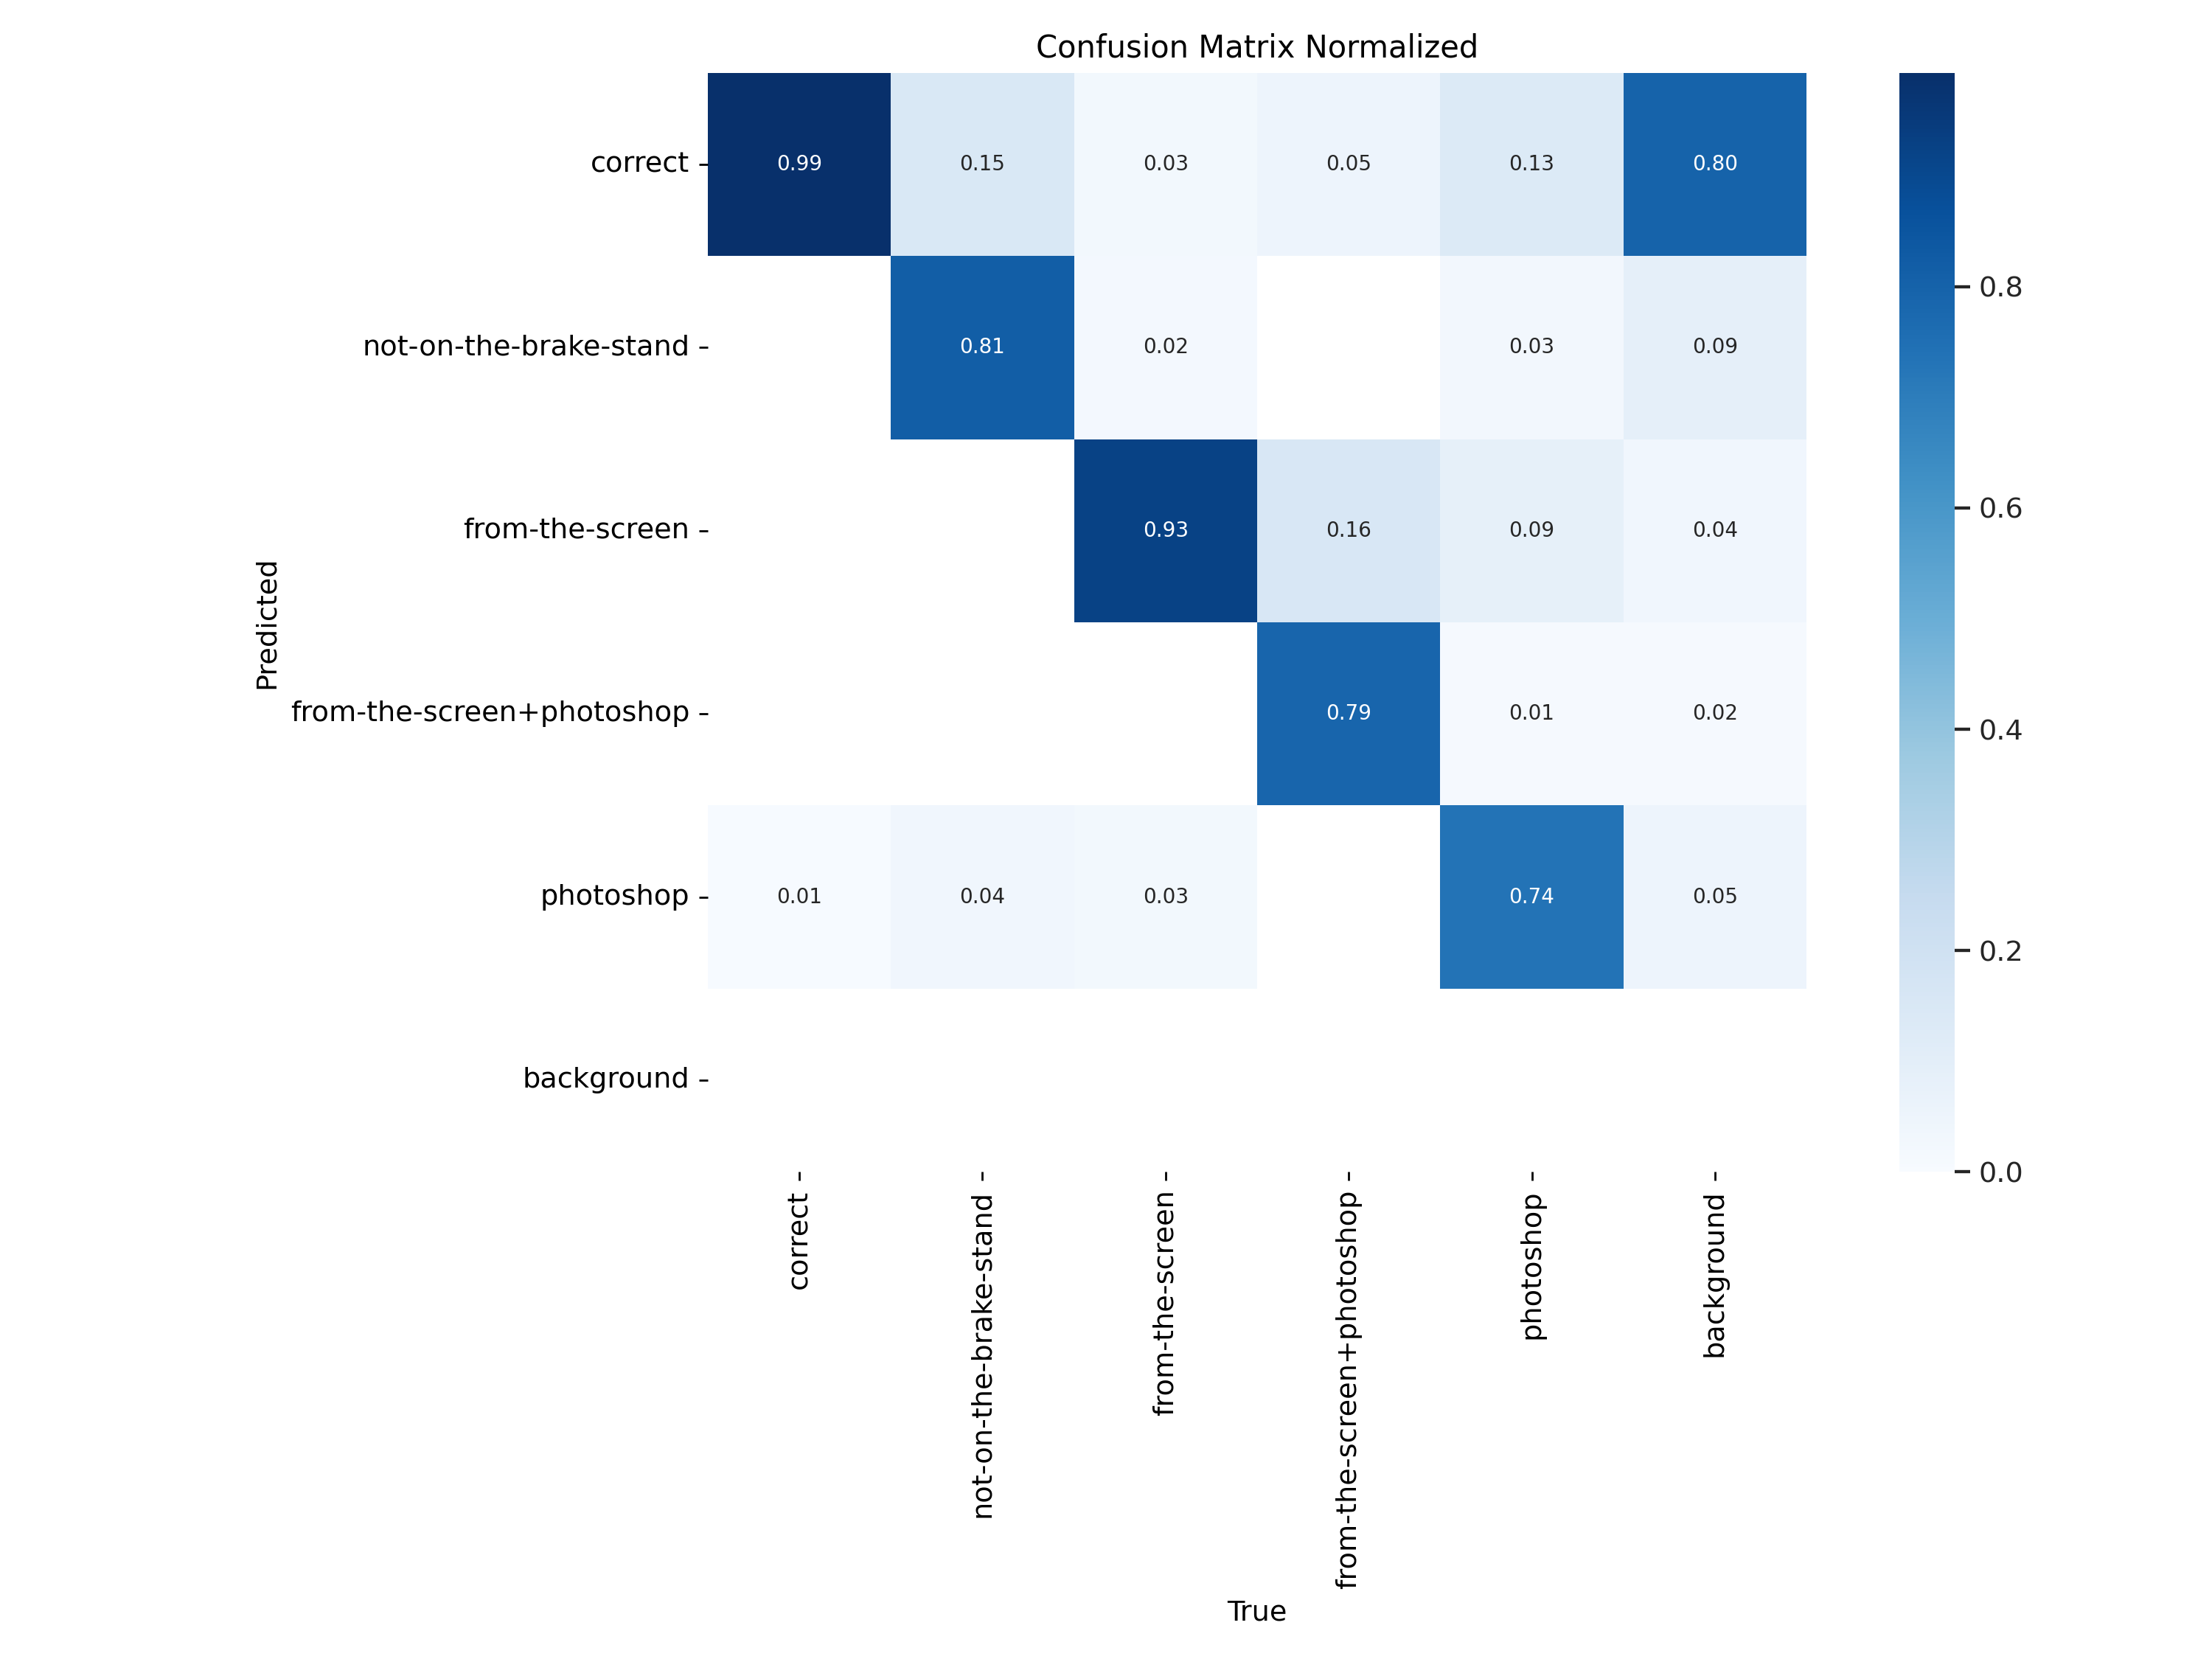

In [12]:
from IPython.display import display,Image

Image(filename="/content/runs/detect/train2/confusion_matrix_normalized.png", width=600)

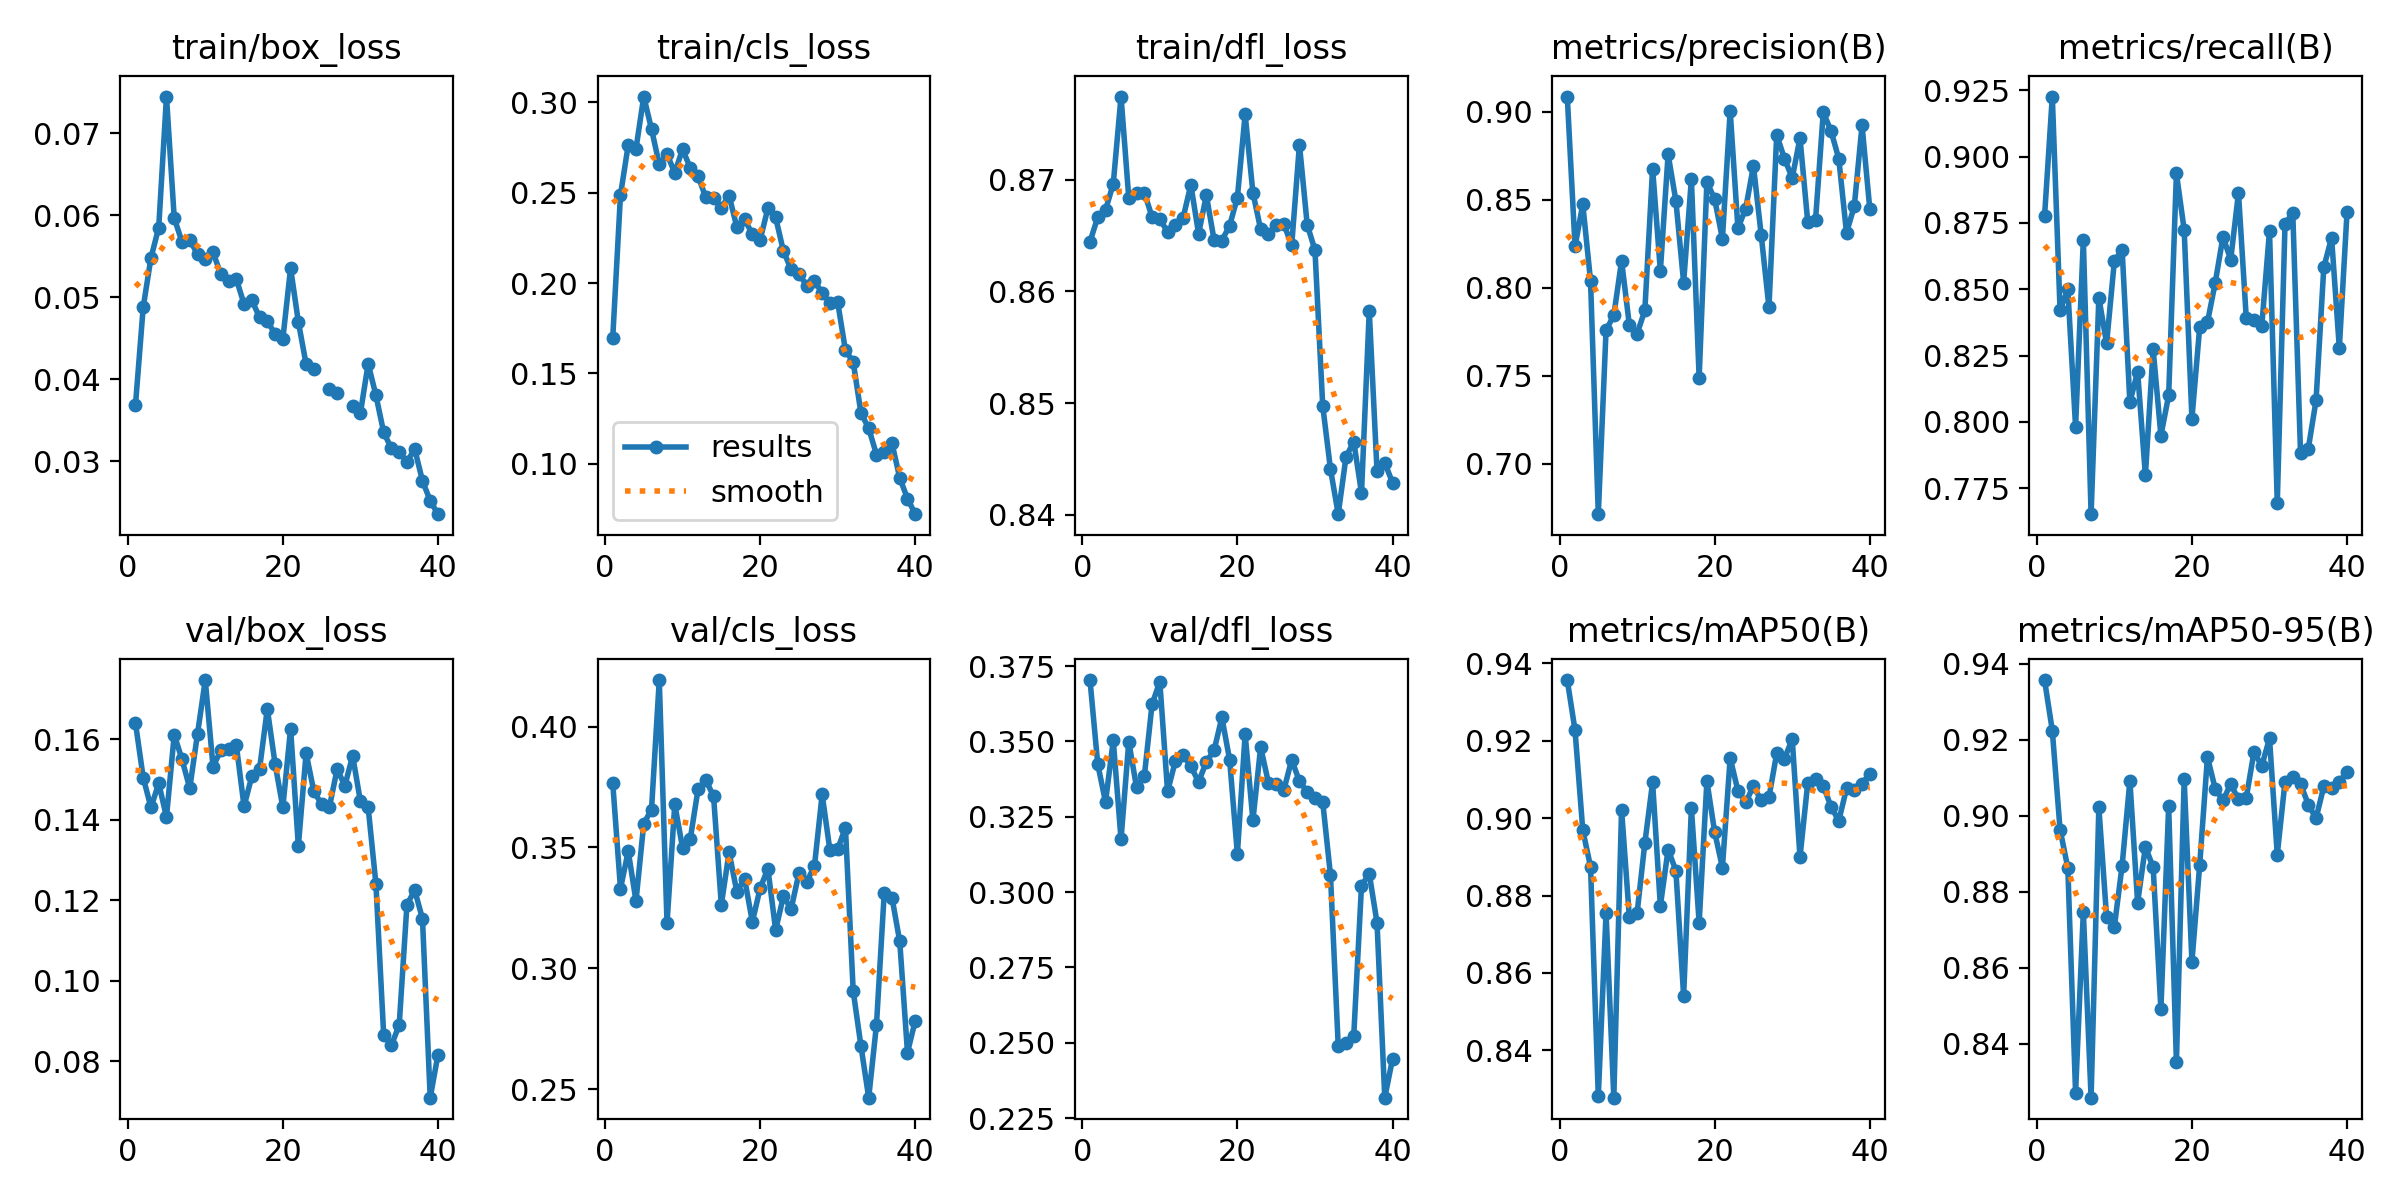

In [13]:
Image(filename="/content/runs/detect/train2/results.png", width=1000)

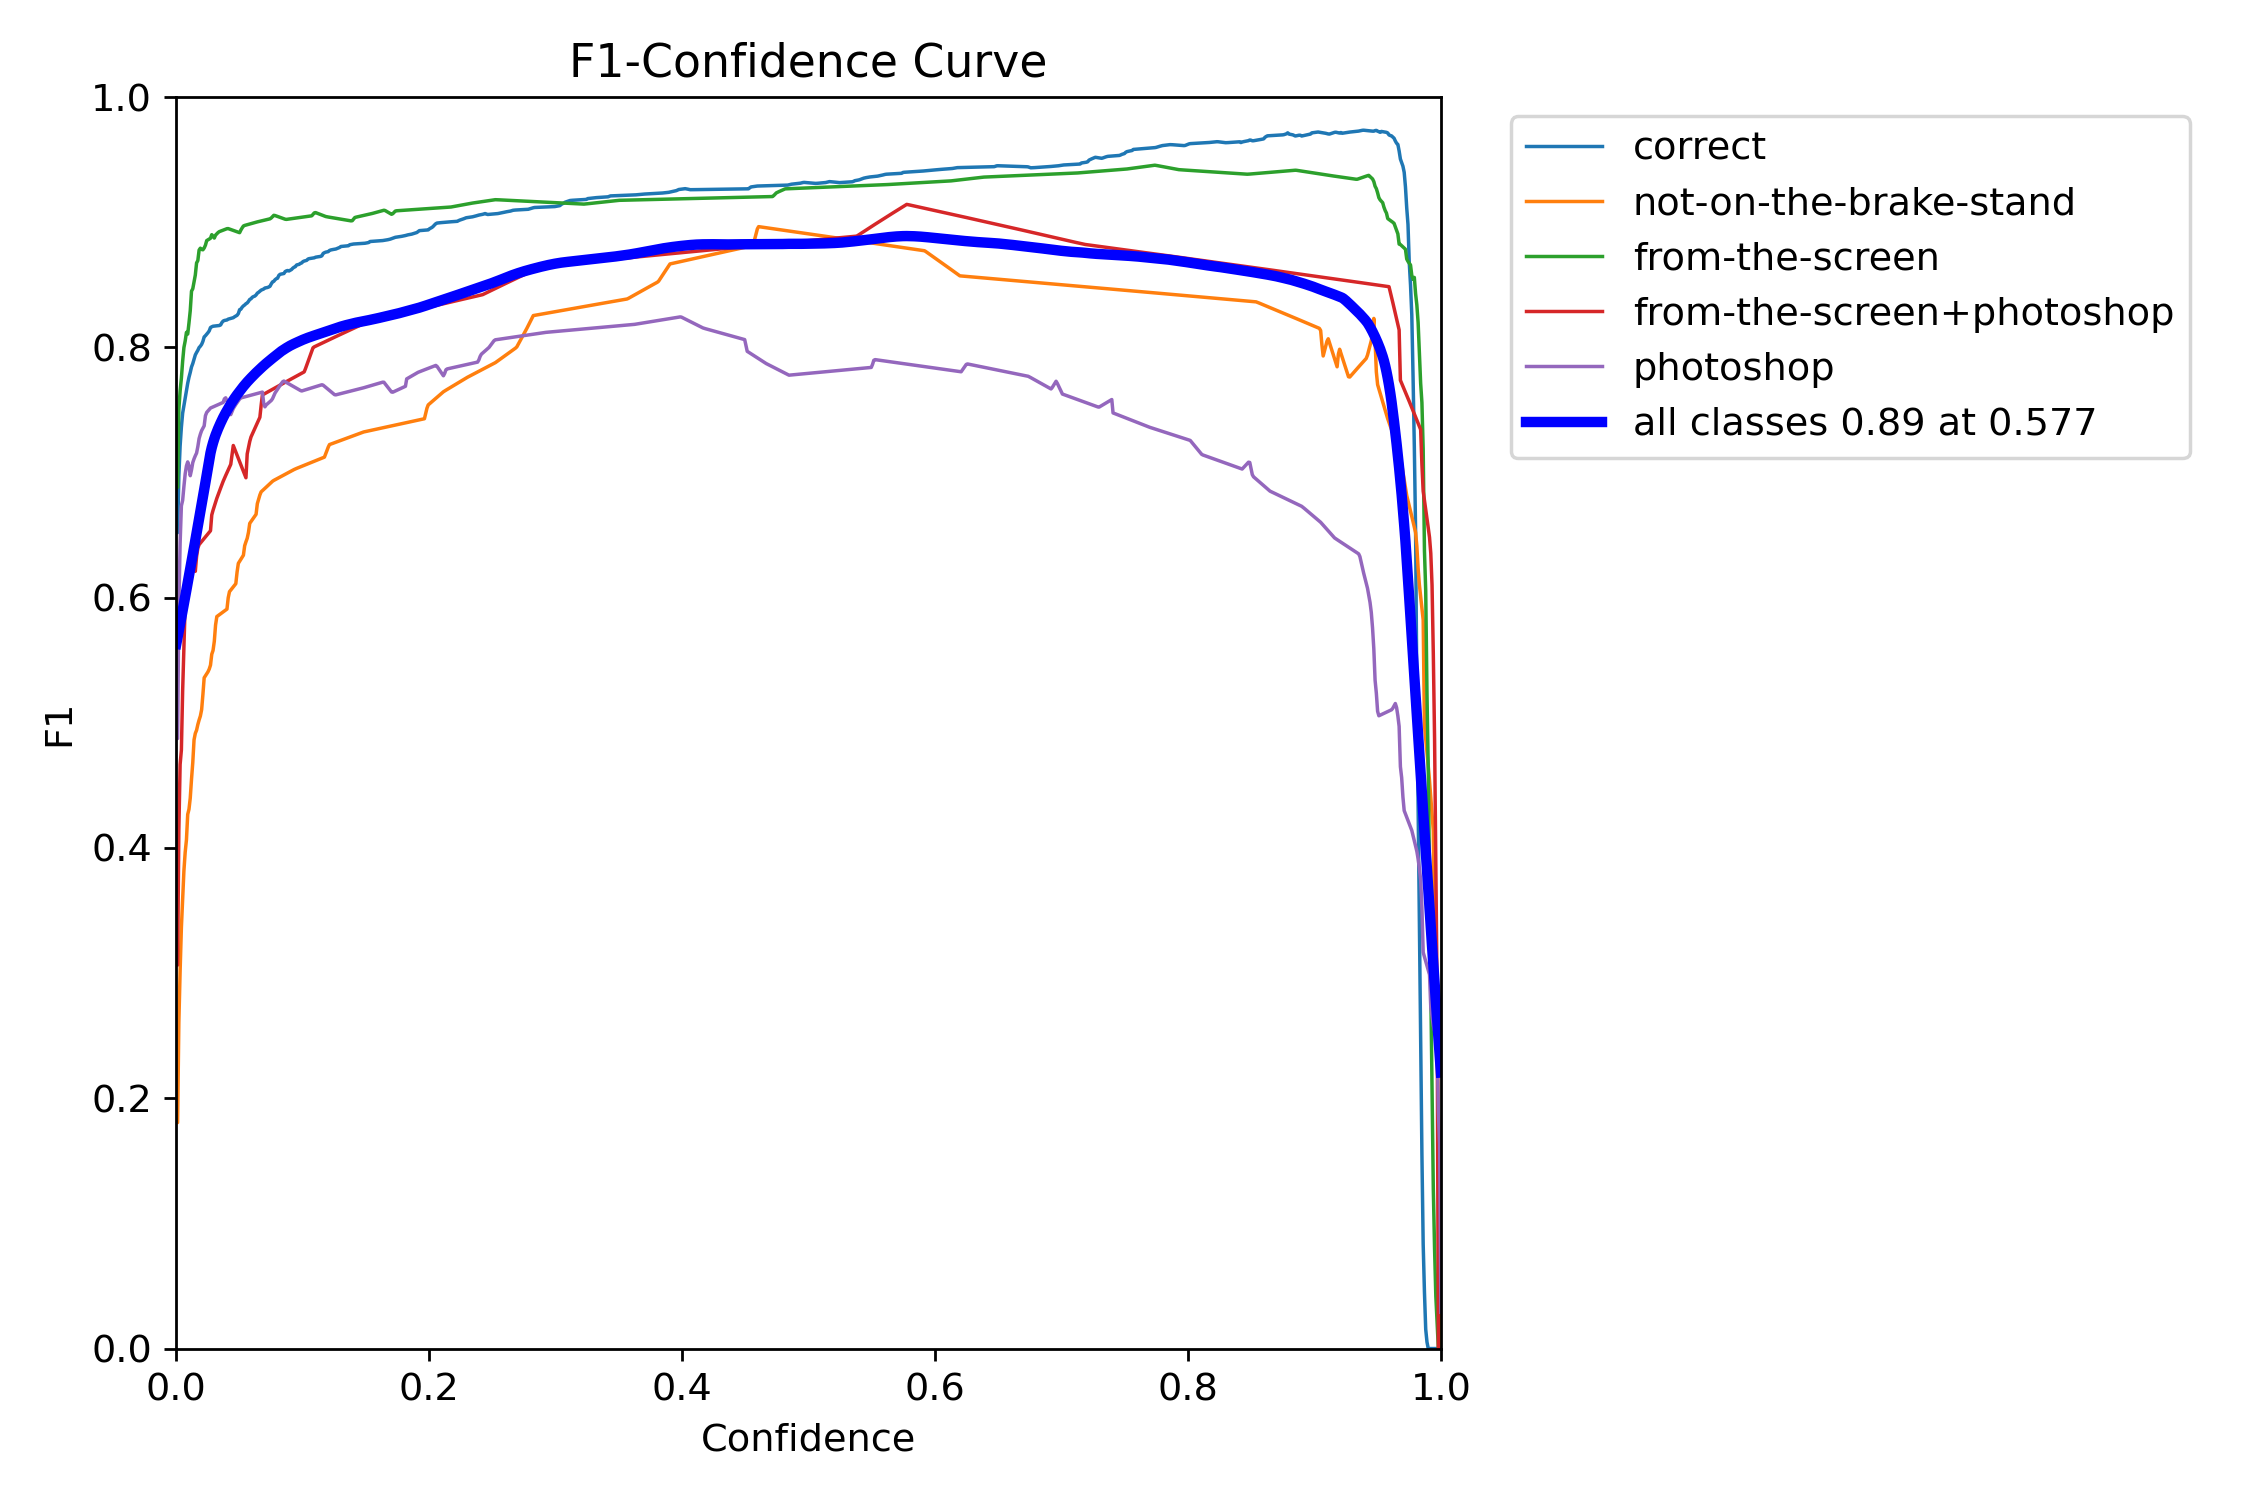

In [15]:
Image(filename="/content/runs/detect/train2/F1_curve.png", width=1000)

In [46]:
from ultralytics import YOLO
import csv

model = YOLO("tech_best.pt")

# Load image names from CSV
with open('test.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    next(reader, None)  # skip header
    image_names = [row[0] for row in reader]
results = []

# Predict each image
for it, image_name in enumerate(image_names):
    image_path = f'techosmotr/techosmotr/test/{image_name}.jpeg'
    results_img = model(image_path)
    for res in results_img:
        if(int(res.boxes[0].cls) == 0 and (res.boxes[0].conf > 0.89)):
            results.append('0')
        else:
            results.append('1')

        for res_box in res.boxes:
            print(it, int(res_box.cls), float(res_box.conf))

# Save to CSV
with open('test.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['file_index', 'class'])  # header
    for img_name, flag in zip(image_names, results):
        writer.writerow([img_name, flag])


image 1/1 /content/techosmotr/techosmotr/test/76395310.jpeg: 384x640 1 correct, 10.6ms
Speed: 3.1ms preprocess, 10.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/78235074.jpeg: 480x640 1 correct, 10.0ms
Speed: 3.3ms preprocess, 10.0ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/74477562.jpeg: 480x640 1 correct, 6.2ms
Speed: 1.8ms preprocess, 6.2ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/70540972.jpeg: 384x640 1 correct, 6.4ms
Speed: 2.0ms preprocess, 6.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/73988993.jpeg: 480x640 1 correct, 6.6ms
Speed: 1.3ms preprocess, 6.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/75194157.jpeg: 480x640 1 correct, 

0 0 0.9915437698364258
1 0 0.9840067028999329
2 0 0.9919894337654114
3 0 0.9911746978759766
4 0 0.9788394570350647
5 0 0.9923350214958191
6 0 0.9887534379959106


image 1/1 /content/techosmotr/techosmotr/test/72575023.jpeg: 384x640 1 correct, 6.0ms
Speed: 1.4ms preprocess, 6.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/75921968.jpeg: 480x640 1 correct, 8.7ms
Speed: 2.2ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/79830636.jpeg: 384x640 1 correct, 6.5ms
Speed: 1.5ms preprocess, 6.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/75057435.jpeg: 480x640 1 correct, 6.8ms
Speed: 1.7ms preprocess, 6.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/74322818.jpeg: 384x640 1 correct, 7.1ms
Speed: 1.6ms preprocess, 7.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/77843279.jpeg: 480x640 1 correct, 6.8ms

7 0 0.9924018383026123
8 0 0.9871542453765869
9 0 0.9919149875640869
10 0 0.9932599663734436
11 0 0.9924837946891785
12 0 0.9830623865127563
13 0 0.9930631518363953



image 1/1 /content/techosmotr/techosmotr/test/76491078.jpeg: 480x640 1 correct, 6.1ms
Speed: 1.4ms preprocess, 6.1ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/79628359.jpeg: 448x640 1 correct, 6.6ms
Speed: 2.0ms preprocess, 6.6ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/techosmotr/techosmotr/test/74322871.jpeg: 480x640 1 correct, 6.8ms
Speed: 1.2ms preprocess, 6.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/77140958.jpeg: 448x640 1 correct, 6.7ms
Speed: 2.1ms preprocess, 6.7ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/techosmotr/techosmotr/test/78904313.jpeg: 480x640 1 correct, 6.9ms
Speed: 1.2ms preprocess, 6.9ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/72365117.jpeg: 544x640 1 correct, 7.9m

14 4 0.8146522641181946
15 0 0.9866282939910889
16 0 0.945637583732605
17 0 0.9886103272438049
18 0 0.9816521406173706
19 0 0.9714061617851257
20 0 0.9873716831207275
21 0 0.9822033643722534
22 0 0.9919690489768982


image 1/1 /content/techosmotr/techosmotr/test/70154255.jpeg: 480x640 1 correct, 7.3ms
Speed: 1.8ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/70738350.jpeg: 480x640 1 correct, 6.2ms
Speed: 2.0ms preprocess, 6.2ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/74407545.jpeg: 384x640 1 correct, 8.1ms
Speed: 1.5ms preprocess, 8.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/78474944.jpeg: 384x640 1 correct, 7.3ms
Speed: 1.6ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/72068047.jpeg: 448x640 1 correct, 6.8ms
Speed: 2.0ms preprocess, 6.8ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/techosmotr/techosmotr/test/70566487.jpeg: 448x640 1 correct, 6.0ms

23 0 0.9783573150634766
24 0 0.9935747981071472
25 0 0.9926637411117554
26 0 0.9910929799079895
27 0 0.989173412322998
28 0 0.983863353729248
29 0 0.9732539057731628


image 1/1 /content/techosmotr/techosmotr/test/72463098.jpeg: 384x640 1 correct, 10.7ms
Speed: 1.5ms preprocess, 10.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/76771211.jpeg: 480x640 1 not-on-the-brake-stand, 6.7ms
Speed: 1.1ms preprocess, 6.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/79289463.jpeg: 384x640 1 correct, 7.8ms
Speed: 1.6ms preprocess, 7.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/72473767.jpeg: 384x640 1 correct, 5.8ms
Speed: 1.5ms preprocess, 5.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/75208055.jpeg: 384x640 1 correct, 6.1ms
Speed: 1.5ms preprocess, 6.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/76718315.jpeg: 384x640

30 0 0.9913458228111267
31 1 0.8327257633209229
32 0 0.9919847846031189
33 0 0.9930048584938049
34 0 0.9928827285766602
35 0 0.9938050508499146
36 0 0.9339317679405212


image 1/1 /content/techosmotr/techosmotr/test/73997574.jpeg: 384x640 1 correct, 6.5ms
Speed: 2.0ms preprocess, 6.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/78938944.jpeg: 384x640 1 correct, 9.9ms
Speed: 1.5ms preprocess, 9.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/71578892.jpeg: 384x640 1 correct, 5.9ms
Speed: 1.5ms preprocess, 5.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/77077451.jpeg: 384x640 1 correct, 6.0ms
Speed: 1.8ms preprocess, 6.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/71761856.jpeg: 384x640 1 correct, 6.8ms
Speed: 1.5ms preprocess, 6.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/74564352.jpeg: 480x640 1 correct, 7.2ms

37 0 0.9940438866615295
38 0 0.991849422454834
39 0 0.9915726184844971
40 0 0.9919958114624023
41 0 0.9918140172958374
42 0 0.9715846180915833
43 0 0.9922997951507568


image 1/1 /content/techosmotr/techosmotr/test/71197521.jpeg: 480x640 1 correct, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/71989080.jpeg: 384x640 1 correct, 7.2ms
Speed: 1.6ms preprocess, 7.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/78823855.jpeg: 544x640 1 correct, 7.9ms
Speed: 2.5ms preprocess, 7.9ms inference, 1.5ms postprocess per image at shape (1, 3, 544, 640)

image 1/1 /content/techosmotr/techosmotr/test/77487875.jpeg: 384x640 1 correct, 7.3ms
Speed: 1.6ms preprocess, 7.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/78183770.jpeg: 480x640 1 correct, 7.0ms
Speed: 2.2ms preprocess, 7.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/75720317.jpeg: 384x640 1 correct, 7.3ms

44 0 0.9388489723205566
45 0 0.9933618307113647
46 0 0.9865782856941223
47 0 0.9931105375289917
48 0 0.9899327754974365
49 0 0.9911463856697083
50 0 0.9838626980781555


image 1/1 /content/techosmotr/techosmotr/test/76322552.jpeg: 384x640 1 correct, 7.0ms
Speed: 1.5ms preprocess, 7.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/70669838.jpeg: 480x640 1 correct, 6.8ms
Speed: 1.3ms preprocess, 6.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/77556004.jpeg: 384x640 1 correct, 6.5ms
Speed: 1.5ms preprocess, 6.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/71416017.jpeg: 384x640 1 correct, 6.2ms
Speed: 1.4ms preprocess, 6.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/76782111.jpeg: 384x640 1 correct, 5.9ms
Speed: 1.5ms preprocess, 5.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/74402016.jpeg: 384x640 1 correct, 6.4ms

51 0 0.9935272336006165
52 0 0.992605447769165
53 0 0.9888734817504883
54 0 0.993878960609436
55 0 0.9924018383026123
56 0 0.991992175579071
57 0 0.9935293793678284


image 1/1 /content/techosmotr/techosmotr/test/78767056.jpeg: 544x640 1 correct, 9.7ms
Speed: 2.3ms preprocess, 9.7ms inference, 1.8ms postprocess per image at shape (1, 3, 544, 640)

image 1/1 /content/techosmotr/techosmotr/test/70763572.jpeg: 384x640 1 correct, 6.5ms
Speed: 1.5ms preprocess, 6.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/79797333.jpeg: 544x640 1 correct, 7.8ms
Speed: 1.9ms preprocess, 7.8ms inference, 1.5ms postprocess per image at shape (1, 3, 544, 640)

image 1/1 /content/techosmotr/techosmotr/test/74501280.jpeg: 544x640 1 correct, 8.5ms
Speed: 2.3ms preprocess, 8.5ms inference, 1.6ms postprocess per image at shape (1, 3, 544, 640)

image 1/1 /content/techosmotr/techosmotr/test/77945397.jpeg: 480x640 1 correct, 6.7ms
Speed: 1.5ms preprocess, 6.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/75035261.jpeg: 384x640 1 correct, 6.7ms

58 0 0.9879044890403748
59 0 0.9933815002441406
60 0 0.9871436953544617
61 0 0.9883008599281311
62 0 0.9924057126045227
63 0 0.9930994510650635
64 0 0.9931631088256836



image 1/1 /content/techosmotr/techosmotr/test/73993408.jpeg: 384x640 1 correct, 6.0ms
Speed: 1.4ms preprocess, 6.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/74348172.jpeg: 480x640 1 correct, 6.8ms
Speed: 1.1ms preprocess, 6.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/72722867.jpeg: 384x640 1 correct, 6.8ms
Speed: 1.4ms preprocess, 6.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/71209861.jpeg: 544x640 1 correct, 7.8ms
Speed: 2.0ms preprocess, 7.8ms inference, 1.6ms postprocess per image at shape (1, 3, 544, 640)

image 1/1 /content/techosmotr/techosmotr/test/74772638.jpeg: 384x640 1 correct, 6.8ms
Speed: 2.1ms preprocess, 6.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/79615607.jpeg: 384x640 1 correct, 6.2m

65 0 0.9916167855262756
66 0 0.9928856492042542
67 0 0.9920651316642761
68 0 0.9901860952377319
69 0 0.9936161041259766
70 0 0.99221271276474


image 1/1 /content/techosmotr/techosmotr/test/74196325.jpeg: 384x640 1 correct, 7.1ms
Speed: 1.6ms preprocess, 7.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/78434663.jpeg: 384x640 1 correct, 6.9ms
Speed: 1.4ms preprocess, 6.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/75156930.jpeg: 480x640 1 correct, 6.6ms
Speed: 1.2ms preprocess, 6.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/71536823.jpeg: 384x640 1 correct, 6.8ms
Speed: 1.8ms preprocess, 6.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/71720388.jpeg: 384x640 1 correct, 6.0ms
Speed: 1.6ms preprocess, 6.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/78758228.jpeg: 480x640 1 correct, 7.9ms

71 0 0.9933584332466125
72 0 0.9926815629005432
73 0 0.9936549663543701
74 0 0.9918777942657471
75 0 0.9941580295562744
76 0 0.990011990070343
77 0 0.9862770438194275


image 1/1 /content/techosmotr/techosmotr/test/77676782.jpeg: 544x640 1 correct, 9.4ms
Speed: 2.5ms preprocess, 9.4ms inference, 2.5ms postprocess per image at shape (1, 3, 544, 640)

image 1/1 /content/techosmotr/techosmotr/test/73931280.jpeg: 480x640 1 photoshop, 7.1ms
Speed: 1.1ms preprocess, 7.1ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/73331324.jpeg: 480x640 1 correct, 6.3ms
Speed: 1.0ms preprocess, 6.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/70176328.jpeg: 480x640 1 correct, 7.3ms
Speed: 1.6ms preprocess, 7.3ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/70976033.jpeg: 480x640 1 correct, 6.1ms
Speed: 1.1ms preprocess, 6.1ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/76339529.jpeg: 480x640 1 correct, 6.1

78 0 0.9868499040603638
79 4 0.9131578803062439
80 0 0.9893213510513306
81 0 0.78941810131073
82 0 0.9663330912590027
83 0 0.9889766573905945
84 0 0.9919877052307129
85 0 0.9855438470840454


image 1/1 /content/techosmotr/techosmotr/test/73088955.jpeg: 384x640 1 correct, 6.8ms
Speed: 1.4ms preprocess, 6.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/77705904.jpeg: 384x640 1 correct, 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/70076792.jpeg: 448x640 1 correct, 6.7ms
Speed: 2.2ms preprocess, 6.7ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/techosmotr/techosmotr/test/75724651.jpeg: 384x640 1 correct, 6.9ms
Speed: 1.4ms preprocess, 6.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/71339053.jpeg: 384x640 1 correct, 6.0ms
Speed: 1.4ms preprocess, 6.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/75560937.jpeg: 384x640 1 correct, 5.9

86 0 0.9921148419380188
87 0 0.9894652366638184
88 0 0.9878278970718384
89 0 0.9933186769485474
90 0 0.9922263622283936
91 0 0.9923198819160461
92 0 0.991898775100708



image 1/1 /content/techosmotr/techosmotr/test/77788753.jpeg: 384x640 1 correct, 6.1ms
Speed: 1.5ms preprocess, 6.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/70620269.jpeg: 544x640 1 correct, 7.7ms
Speed: 2.3ms preprocess, 7.7ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)

image 1/1 /content/techosmotr/techosmotr/test/79846760.jpeg: 384x640 1 correct, 6.4ms
Speed: 1.5ms preprocess, 6.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/75407878.jpeg: 384x640 1 correct, 5.9ms
Speed: 1.5ms preprocess, 5.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/70536008.jpeg: 480x640 1 correct, 6.7ms
Speed: 2.1ms preprocess, 6.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/77652840.jpeg: 480x640 1 correct, 6.3m

93 0 0.9932183623313904
94 0 0.9904080033302307
95 0 0.9932089447975159
96 0 0.9931962490081787
97 0 0.9885836839675903
98 0 0.911749005317688
99 0 0.9918609857559204
100 0 0.9876502156257629


image 1/1 /content/techosmotr/techosmotr/test/74009476.jpeg: 480x640 1 correct, 6.2ms
Speed: 2.1ms preprocess, 6.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/77522005.jpeg: 480x640 1 correct, 7.0ms
Speed: 1.7ms preprocess, 7.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/79353203.jpeg: 384x640 1 correct, 6.7ms
Speed: 2.1ms preprocess, 6.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/73245977.jpeg: 448x640 1 correct, 6.6ms
Speed: 1.9ms preprocess, 6.6ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/techosmotr/techosmotr/test/76786263.jpeg: 384x640 1 correct, 6.7ms
Speed: 1.4ms preprocess, 6.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/76844346.jpeg: 544x640 1 correct, 7.7m


101 0 0.9870087504386902
102 0 0.9942948222160339
103 0 0.9919295310974121
104 0 0.9811267256736755
105 0 0.9910581111907959
106 0 0.9871669411659241


image 1/1 /content/techosmotr/techosmotr/test/70232167.jpeg: 480x640 1 correct, 7.5ms
Speed: 2.0ms preprocess, 7.5ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/76903258.jpeg: 384x640 1 correct, 7.0ms
Speed: 1.5ms preprocess, 7.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/74749440.jpeg: 480x640 1 correct, 6.6ms
Speed: 1.5ms preprocess, 6.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/72121893.jpeg: 480x640 1 correct, 6.0ms
Speed: 1.6ms preprocess, 6.0ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/77400657.jpeg: 480x640 1 correct, 6.3ms
Speed: 1.1ms preprocess, 6.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/75120041.jpeg: 384x640 1 correct, 6.8ms

107 0 0.9932779669761658
108 0 0.9922310709953308
109 0 0.989821195602417
110 0 0.993655800819397
111 0 0.9723243713378906
112 0 0.9919684529304504
113 0 0.9920824766159058



image 1/1 /content/techosmotr/techosmotr/test/74376828.jpeg: 480x640 1 correct, 6.0ms
Speed: 2.1ms preprocess, 6.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/70657345.jpeg: 384x640 1 correct, 6.9ms
Speed: 1.9ms preprocess, 6.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/75209849.jpeg: 384x640 1 correct, 6.0ms
Speed: 1.4ms preprocess, 6.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/78495127.jpeg: 480x640 1 correct, 6.6ms
Speed: 1.2ms preprocess, 6.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/74954567.jpeg: 384x640 1 correct, 6.4ms
Speed: 1.4ms preprocess, 6.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/75492160.jpeg: 480x640 1 correct, 10.3

114 0 0.9931487441062927
115 0 0.992173433303833
116 0 0.9914548397064209
117 0 0.992319643497467
118 0 0.9880567789077759
119 0 0.9823164343833923
120 0 0.9861800074577332


image 1/1 /content/techosmotr/techosmotr/test/74749715.jpeg: 384x640 1 correct, 6.8ms
Speed: 1.6ms preprocess, 6.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/74978001.jpeg: 384x640 1 correct, 6.3ms
Speed: 1.5ms preprocess, 6.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/79464179.jpeg: 384x640 1 correct, 6.1ms
Speed: 1.4ms preprocess, 6.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/75029067.jpeg: 480x640 1 correct, 6.6ms
Speed: 1.1ms preprocess, 6.6ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/75076669.jpeg: 448x640 1 correct, 6.8ms
Speed: 1.6ms preprocess, 6.8ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/techosmotr/techosmotr/test/75247488.jpeg: 480x640 1 correct, 6.9ms

121 0 0.9915189146995544
122 0 0.9934749007225037
123 0 0.9896088242530823
124 0 0.9924277663230896
125 0 0.9876532554626465
126 0 0.9462930560112
127 0 0.9900471568107605


image 1/1 /content/techosmotr/techosmotr/test/76087276.jpeg: 384x640 1 correct, 9.3ms
Speed: 1.4ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/76954750.jpeg: 544x640 1 correct, 8.0ms
Speed: 2.3ms preprocess, 8.0ms inference, 1.5ms postprocess per image at shape (1, 3, 544, 640)

image 1/1 /content/techosmotr/techosmotr/test/70103118.jpeg: 480x640 1 correct, 6.7ms
Speed: 1.0ms preprocess, 6.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/70288660.jpeg: 480x640 1 correct, 6.0ms
Speed: 1.0ms preprocess, 6.0ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/73839336.jpeg: 480x640 1 correct, 6.0ms
Speed: 2.7ms preprocess, 6.0ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/73029556.jpeg: 384x640 1 correct, 7.0ms

128 0 0.9933706521987915
129 0 0.9879790544509888
130 0 0.9867238402366638
131 0 0.9887953996658325
132 0 0.9890615940093994
133 0 0.9928916692733765
134 0 0.991661548614502


image 1/1 /content/techosmotr/techosmotr/test/76173806.jpeg: 544x640 1 correct, 8.4ms
Speed: 3.3ms preprocess, 8.4ms inference, 3.1ms postprocess per image at shape (1, 3, 544, 640)

image 1/1 /content/techosmotr/techosmotr/test/73257252.jpeg: 480x640 1 correct, 6.7ms
Speed: 1.1ms preprocess, 6.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/79728095.jpeg: 480x640 1 correct, 6.1ms
Speed: 1.0ms preprocess, 6.1ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/76772898.jpeg: 448x640 1 correct, 6.6ms
Speed: 1.6ms preprocess, 6.6ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/techosmotr/techosmotr/test/73983475.jpeg: 384x640 1 correct, 7.0ms
Speed: 1.5ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/70172546.jpeg: 384x640 1 correct, 7.8ms

135 0 0.9888258576393127
136 0 0.9903214573860168
137 0 0.9627997875213623
138 0 0.9929918050765991
139 0 0.9935239553451538
140 0 0.9910274147987366
141 0 0.9912847280502319



image 1/1 /content/techosmotr/techosmotr/test/78069082.jpeg: 480x640 1 from-the-screen, 1 photoshop, 7.0ms
Speed: 2.0ms preprocess, 7.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/74587586.jpeg: 384x640 1 correct, 6.5ms
Speed: 1.6ms preprocess, 6.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/79793732.jpeg: 384x640 1 correct, 5.9ms
Speed: 1.4ms preprocess, 5.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/71073228.jpeg: 544x640 1 correct, 7.7ms
Speed: 2.0ms preprocess, 7.7ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)

image 1/1 /content/techosmotr/techosmotr/test/76527606.jpeg: 480x640 1 correct, 6.6ms
Speed: 1.7ms preprocess, 6.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/75119409.jpeg: 38

142 0 0.9882678389549255
143 2 0.6893900632858276
143 4 0.3195030093193054
144 0 0.9925742149353027
145 0 0.9905043244361877
146 0 0.9840477108955383
147 0 0.9900168776512146
148 0 0.9891173243522644


image 1/1 /content/techosmotr/techosmotr/test/71619498.jpeg: 480x640 1 correct, 10.2ms
Speed: 1.4ms preprocess, 10.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/77253714.jpeg: 544x640 1 correct, 7.7ms
Speed: 2.0ms preprocess, 7.7ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)

image 1/1 /content/techosmotr/techosmotr/test/74526152.jpeg: 544x640 1 correct, 7.3ms
Speed: 2.2ms preprocess, 7.3ms inference, 1.5ms postprocess per image at shape (1, 3, 544, 640)

image 1/1 /content/techosmotr/techosmotr/test/79991111.jpeg: 384x640 1 correct, 6.6ms
Speed: 1.6ms preprocess, 6.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/76816875.jpeg: 512x640 1 correct, 9.3ms
Speed: 3.0ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 640)

image 1/1 /content/techosmotr/techosmotr/test/75850706.jpeg: 384x640 1 correct, 7.4

149 0 0.9871340394020081
150 0 0.9890797734260559
151 0 0.9888613820075989
152 0 0.9943497776985168
153 0 0.985901951789856
154 0 0.9930344820022583


image 1/1 /content/techosmotr/techosmotr/test/71779291.jpeg: 480x640 1 correct, 8.8ms
Speed: 1.0ms preprocess, 8.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/79551747.jpeg: 384x640 1 correct, 6.8ms
Speed: 1.9ms preprocess, 6.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/74933910.jpeg: 480x640 1 correct, 6.7ms
Speed: 1.1ms preprocess, 6.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/79744126.jpeg: 544x640 1 correct, 7.8ms
Speed: 2.0ms preprocess, 7.8ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)

image 1/1 /content/techosmotr/techosmotr/test/70288812.jpeg: 384x640 1 correct, 7.2ms
Speed: 2.1ms preprocess, 7.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/74818070.jpeg: 480x640 1 correct, 6.6ms

155 0 0.9895148277282715
156 0 0.992455244064331
157 0 0.9906813502311707
158 0 0.9875800013542175
159 0 0.9749386310577393
160 0 0.9889328479766846


image 1/1 /content/techosmotr/techosmotr/test/72906468.jpeg: 384x640 1 correct, 9.2ms
Speed: 1.5ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/73353885.jpeg: 544x640 1 correct, 7.9ms
Speed: 2.5ms preprocess, 7.9ms inference, 1.5ms postprocess per image at shape (1, 3, 544, 640)

image 1/1 /content/techosmotr/techosmotr/test/75956242.jpeg: 544x640 1 correct, 7.1ms
Speed: 2.3ms preprocess, 7.1ms inference, 1.5ms postprocess per image at shape (1, 3, 544, 640)

image 1/1 /content/techosmotr/techosmotr/test/73906461.jpeg: 480x640 1 correct, 6.9ms
Speed: 1.0ms preprocess, 6.9ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/79784372.jpeg: 384x640 1 correct, 6.6ms
Speed: 2.0ms preprocess, 6.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/78092861.jpeg: 384x640 1 correct, 6.0ms

161 0 0.9898972511291504
162 0 0.9899565577507019
163 0 0.9873719215393066
164 0 0.9648728966712952
165 0 0.9928604960441589
166 0 0.9919318556785583


image 1/1 /content/techosmotr/techosmotr/test/73728389.jpeg: 480x640 1 correct, 17.0ms
Speed: 1.1ms preprocess, 17.0ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/73884753.jpeg: 480x640 1 correct, 6.1ms
Speed: 1.2ms preprocess, 6.1ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/76068221.jpeg: 480x640 1 correct, 6.2ms
Speed: 1.1ms preprocess, 6.2ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/71838662.jpeg: 448x640 1 correct, 7.0ms
Speed: 2.9ms preprocess, 7.0ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/techosmotr/techosmotr/test/74585665.jpeg: 480x640 1 correct, 6.9ms
Speed: 1.0ms preprocess, 6.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/71355046.jpeg: 480x640 1 correct, 6.0

167 0 0.9886600971221924
168 0 0.9917906522750854
169 0 0.9746506810188293
170 0 0.9848057627677917
171 0 0.9868767261505127
172 0 0.8498138785362244
173 0 0.9876973032951355
174 0 0.9919948577880859


image 1/1 /content/techosmotr/techosmotr/test/79204262.jpeg: 384x640 1 correct, 8.5ms
Speed: 2.4ms preprocess, 8.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/78469627.jpeg: 480x640 1 correct, 6.7ms
Speed: 2.0ms preprocess, 6.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/79573899.jpeg: 480x640 1 correct, 11.6ms
Speed: 1.3ms preprocess, 11.6ms inference, 2.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/77323428.jpeg: 384x640 1 correct, 10.2ms
Speed: 3.7ms preprocess, 10.2ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)



175 0 0.9899022579193115
176 0 0.9876011610031128
177 0 0.9513646960258484
178 0 0.992300271987915


image 1/1 /content/techosmotr/techosmotr/test/70913297.jpeg: 384x640 1 correct, 11.5ms
Speed: 2.2ms preprocess, 11.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/70643128.jpeg: 384x640 1 correct, 8.1ms
Speed: 1.9ms preprocess, 8.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/79424388.jpeg: 544x640 1 correct, 9.6ms
Speed: 2.4ms preprocess, 9.6ms inference, 2.1ms postprocess per image at shape (1, 3, 544, 640)

image 1/1 /content/techosmotr/techosmotr/test/72441097.jpeg: 384x640 1 correct, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



179 0 0.9887669682502747
180 0 0.9925954937934875
181 0 0.9895634055137634
182 0 0.9915189146995544


image 1/1 /content/techosmotr/techosmotr/test/77091326.jpeg: 384x640 1 correct, 11.0ms
Speed: 3.1ms preprocess, 11.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/78125526.jpeg: 384x640 1 correct, 8.5ms
Speed: 1.6ms preprocess, 8.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/78927595.jpeg: 384x640 1 correct, 8.5ms
Speed: 1.6ms preprocess, 8.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/75593133.jpeg: 544x640 1 correct, 9.1ms
Speed: 2.3ms preprocess, 9.1ms inference, 1.9ms postprocess per image at shape (1, 3, 544, 640)

image 1/1 /content/techosmotr/techosmotr/test/77226691.jpeg: 480x640 1 correct, 8.9ms
Speed: 1.3ms preprocess, 8.9ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)



183 0 0.9934297204017639
184 0 0.9910590052604675
185 0 0.9938803911209106
186 0 0.989672064781189
187 0 0.9620433449745178


image 1/1 /content/techosmotr/techosmotr/test/74100298.jpeg: 384x640 1 correct, 8.9ms
Speed: 1.7ms preprocess, 8.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/71260080.jpeg: 448x640 1 correct, 9.0ms
Speed: 3.2ms preprocess, 9.0ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/techosmotr/techosmotr/test/79059036.jpeg: 384x640 1 correct, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/75296034.jpeg: 384x640 1 correct, 8.3ms
Speed: 1.9ms preprocess, 8.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/77066959.jpeg: 384x640 1 correct, 8.7ms
Speed: 3.0ms preprocess, 8.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



188 0 0.9923938512802124
189 0 0.9873122572898865
190 0 0.9921287298202515
191 0 0.9927767515182495
192 0 0.9914018511772156


image 1/1 /content/techosmotr/techosmotr/test/71461599.jpeg: 384x640 1 correct, 8.6ms
Speed: 2.1ms preprocess, 8.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/79942970.jpeg: 384x640 1 correct, 8.5ms
Speed: 1.6ms preprocess, 8.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/78431945.jpeg: 480x640 1 correct, 8.9ms
Speed: 1.3ms preprocess, 8.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/74680456.jpeg: 480x640 1 correct, 7.9ms
Speed: 1.4ms preprocess, 7.9ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/78672316.jpeg: 384x640 1 correct, 8.7ms
Speed: 2.8ms preprocess, 8.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/72922405.jpeg: 544x640 1 correct, 9.0ms

193 0 0.9919745326042175
194 0 0.9892242550849915
195 0 0.9921650886535645
196 0 0.9915731549263
197 0 0.993405818939209
198 0 0.9888572096824646


image 1/1 /content/techosmotr/techosmotr/test/74096519.jpeg: 384x640 1 correct, 9.1ms
Speed: 2.9ms preprocess, 9.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/70865985.jpeg: 480x640 1 photoshop, 8.7ms
Speed: 1.3ms preprocess, 8.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/76196047.jpeg: 384x640 1 correct, 9.1ms
Speed: 3.2ms preprocess, 9.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/77603153.jpeg: 480x640 1 correct, 11.9ms
Speed: 1.3ms preprocess, 11.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/79905540.jpeg: 384x640 1 correct, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



199 0 0.9933049082756042
200 4 0.8979611992835999
201 0 0.9938701391220093
202 0 0.9898175597190857
203 0 0.9919106364250183


image 1/1 /content/techosmotr/techosmotr/test/75729867.jpeg: 384x640 1 correct, 12.9ms
Speed: 1.8ms preprocess, 12.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/79725622.jpeg: 384x640 1 correct, 8.7ms
Speed: 3.1ms preprocess, 8.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/76183511.jpeg: 448x640 1 correct, 9.3ms
Speed: 3.3ms preprocess, 9.3ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/techosmotr/techosmotr/test/79959403.jpeg: 384x640 1 correct, 8.7ms
Speed: 1.7ms preprocess, 8.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



204 0 0.9915193915367126
205 0 0.9898174405097961
206 0 0.9882100820541382
207 0 0.9923740029335022


image 1/1 /content/techosmotr/techosmotr/test/71830579.jpeg: 544x640 1 correct, 11.1ms
Speed: 3.7ms preprocess, 11.1ms inference, 1.9ms postprocess per image at shape (1, 3, 544, 640)

image 1/1 /content/techosmotr/techosmotr/test/78359342.jpeg: 384x640 1 correct, 8.9ms
Speed: 1.7ms preprocess, 8.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/70015236.jpeg: 448x640 1 correct, 8.8ms
Speed: 3.0ms preprocess, 8.8ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/techosmotr/techosmotr/test/78052497.jpeg: 384x640 1 correct, 9.6ms
Speed: 1.6ms preprocess, 9.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/79780926.jpeg: 480x640 1 correct, 9.0ms
Speed: 1.5ms preprocess, 9.0ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/75773965.jpeg: 384x640 1 correct, 8.8

208 0 0.9886947274208069
209 0 0.9911046624183655
210 0 0.9873977899551392
211 0 0.9908388257026672
212 0 0.9898596405982971



image 1/1 /content/techosmotr/techosmotr/test/77772475.jpeg: 384x640 1 correct, 8.8ms
Speed: 1.7ms preprocess, 8.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/70897251.jpeg: 480x640 1 correct, 9.3ms
Speed: 1.4ms preprocess, 9.3ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/74841713.jpeg: 480x640 1 correct, 7.9ms
Speed: 1.5ms preprocess, 7.9ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/79361624.jpeg: 480x640 1 correct, 7.8ms
Speed: 1.2ms preprocess, 7.8ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/75140372.jpeg: 384x640 1 correct, 8.9ms
Speed: 1.6ms preprocess, 8.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



213 0 0.990199089050293
214 0 0.9935558438301086
215 0 0.9865248203277588
216 0 0.9912810921669006
217 0 0.7226836681365967
218 0 0.993385374546051


image 1/1 /content/techosmotr/techosmotr/test/76862750.jpeg: 448x640 1 correct, 10.3ms
Speed: 2.9ms preprocess, 10.3ms inference, 2.4ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/techosmotr/techosmotr/test/74691612.jpeg: 384x640 1 correct, 11.1ms
Speed: 4.9ms preprocess, 11.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/79082462.jpeg: 544x640 1 correct, 10.2ms
Speed: 3.6ms preprocess, 10.2ms inference, 2.4ms postprocess per image at shape (1, 3, 544, 640)

image 1/1 /content/techosmotr/techosmotr/test/74337522.jpeg: 384x640 1 correct, 10.5ms
Speed: 2.8ms preprocess, 10.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/71450381.jpeg: 480x640 1 correct, 10.3ms
Speed: 2.2ms preprocess, 10.3ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/70831918.jpeg: 384x640 1 corr

219 0 0.9865908622741699
220 0 0.9917181730270386
221 0 0.9894888997077942
222 0 0.9909499287605286
223 0 0.9924271702766418
224 0


image 1/1 /content/techosmotr/techosmotr/test/75152199.jpeg: 480x640 1 correct, 9.9ms
Speed: 1.4ms preprocess, 9.9ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/77493592.jpeg: 384x640 1 correct, 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/70762932.jpeg: 384x640 1 correct, 8.0ms
Speed: 1.6ms preprocess, 8.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/70796344.jpeg: 544x640 1 correct, 12.2ms
Speed: 2.9ms preprocess, 12.2ms inference, 1.9ms postprocess per image at shape (1, 3, 544, 640)



 0.9932768940925598
225 0 0.9868738055229187
226 0 0.9916330575942993
227 0 0.9928094148635864
228 0 0.98800128698349


image 1/1 /content/techosmotr/techosmotr/test/79288417.jpeg: 384x640 1 correct, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/77727390.jpeg: 480x640 1 correct, 11.4ms
Speed: 1.4ms preprocess, 11.4ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/73449857.jpeg: 480x640 1 correct, 9.1ms
Speed: 2.6ms preprocess, 9.1ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/76950703.jpeg: 480x640 1 correct, 8.3ms
Speed: 2.1ms preprocess, 8.3ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/78341326.jpeg: 384x640 1 correct, 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/74970452.jpeg: 384x640 1 correct, 1

229 0 0.9910315275192261
230 0 0.989599347114563
231 0 0.9924983382225037
232 0 0.9878183603286743
233 0 0.9927592277526855
234 0 0.9930692911148071


image 1/1 /content/techosmotr/techosmotr/test/76102039.jpeg: 480x640 1 correct, 11.2ms
Speed: 1.4ms preprocess, 11.2ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/71540481.jpeg: 384x640 1 correct, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/75962972.jpeg: 480x640 1 correct, 15.8ms
Speed: 2.5ms preprocess, 15.8ms inference, 2.7ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/79193540.jpeg: 384x640 1 correct, 9.2ms
Speed: 3.2ms preprocess, 9.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/76649585.jpeg: 384x640 1 correct, 12.1ms
Speed: 3.8ms preprocess, 12.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)



235 0 0.9913979768753052
236 0 0.9917962551116943
237 0 0.9918986558914185
238 0 0.9916976690292358
239 0 0.9929448962211609


image 1/1 /content/techosmotr/techosmotr/test/74762491.jpeg: 384x640 1 correct, 7.8ms
Speed: 1.8ms preprocess, 7.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/78492418.jpeg: 480x640 1 correct, 10.8ms
Speed: 3.2ms preprocess, 10.8ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/74223121.jpeg: 480x640 1 correct, 10.5ms
Speed: 1.2ms preprocess, 10.5ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/76447764.jpeg: 384x640 1 correct, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/74212164.jpeg: 544x640 1 correct, 8.6ms
Speed: 3.2ms preprocess, 8.6ms inference, 1.9ms postprocess per image at shape (1, 3, 544, 640)

image 1/1 /content/techosmotr/techosmotr/test/76416319.jpeg: 384x640 1 correct, 1

240 0 0.9914742708206177
241 0 0.9904149770736694
242 0 0.9818805456161499
243 0 0.9930088520050049
244 0 0.9904661178588867
245 0 0.9929416179656982


image 1/1 /content/techosmotr/techosmotr/test/75671325.jpeg: 480x640 1 correct, 14.4ms
Speed: 1.2ms preprocess, 14.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/73199155.jpeg: 384x640 1 correct, 12.4ms
Speed: 1.7ms preprocess, 12.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/73493850.jpeg: 384x640 1 correct, 10.6ms
Speed: 1.7ms preprocess, 10.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/72619733.jpeg: 384x640 1 correct, 6.4ms
Speed: 2.1ms preprocess, 6.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/75506212.jpeg: 384x640 1 correct, 6.1ms
Speed: 1.4ms preprocess, 6.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)



246 0 0.9895414710044861
247 0 0.9936863780021667
248 0 0.9933891296386719
249 0 0.9926032423973083
250 0 0.9939441084861755


image 1/1 /content/techosmotr/techosmotr/test/76358371.jpeg: 384x640 1 correct, 10.1ms
Speed: 2.0ms preprocess, 10.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/72858765.jpeg: 480x640 1 correct, 8.2ms
Speed: 1.3ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/79493430.jpeg: 480x640 1 correct, 7.0ms
Speed: 1.4ms preprocess, 7.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/78438007.jpeg: 544x640 1 correct, 10.0ms
Speed: 3.4ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 544, 640)

image 1/1 /content/techosmotr/techosmotr/test/76427308.jpeg: 480x640 1 correct, 6.6ms
Speed: 1.0ms preprocess, 6.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/79325597.jpeg: 384x640 1 correct, 6

251 0 0.9894176125526428
252 0 0.9911154508590698
253 0 0.9910643100738525
254 0 0.9875621795654297
255 0 0.9917663931846619
256 0 0.9909461736679077
257 0 0.984473466873169
258 0 0.9893298745155334


image 1/1 /content/techosmotr/techosmotr/test/72594359.jpeg: 384x640 1 correct, 6.5ms
Speed: 1.4ms preprocess, 6.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/75792749.jpeg: 480x640 1 correct, 7.9ms
Speed: 1.1ms preprocess, 7.9ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/76822638.jpeg: 384x640 1 correct, 6.8ms
Speed: 1.5ms preprocess, 6.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/75002606.jpeg: 480x640 1 correct, 7.2ms
Speed: 1.1ms preprocess, 7.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/78203321.jpeg: 480x640 1 correct, 6.0ms
Speed: 1.1ms preprocess, 6.0ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/76326114.jpeg: 480x640 1 correct, 7.4ms

259 0 0.9915865659713745
260 0 0.9926894307136536
261 0 0.9916709661483765
262 0 0.9535914063453674
263 0 0.9879554510116577
264 0 0.9923670887947083
265 0 0.9926871061325073
266 0 0.9925702214241028


image 1/1 /content/techosmotr/techosmotr/test/76520267.jpeg: 384x640 1 correct, 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/72739561.jpeg: 384x640 1 correct, 8.1ms
Speed: 1.5ms preprocess, 8.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/75380067.jpeg: 384x640 1 correct, 6.6ms
Speed: 1.5ms preprocess, 6.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/72403731.jpeg: 448x640 1 correct, 6.7ms
Speed: 2.0ms preprocess, 6.7ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/techosmotr/techosmotr/test/73494395.jpeg: 384x640 1 correct, 6.9ms
Speed: 1.7ms preprocess, 6.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/72972284.jpeg: 384x640 1 correct, 6.1ms

267 0 0.9903360605239868
268 0 0.9920011758804321
269 0 0.9920516014099121
270 0 0.986789882183075
271 0 0.9928913116455078
272 0 0.9908170700073242
273 0 0.9929637312889099



image 1/1 /content/techosmotr/techosmotr/test/73570383.jpeg: 480x640 1 correct, 6.0ms
Speed: 2.7ms preprocess, 6.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/72175938.jpeg: 448x640 1 correct, 6.7ms
Speed: 1.6ms preprocess, 6.7ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/techosmotr/techosmotr/test/75541350.jpeg: 480x640 1 correct, 9.7ms
Speed: 1.3ms preprocess, 9.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/77648904.jpeg: 480x640 1 correct, 6.0ms
Speed: 1.7ms preprocess, 6.0ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/72721092.jpeg: 384x640 1 correct, 6.7ms
Speed: 1.5ms preprocess, 6.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/73543391.jpeg: 480x640 1 correct, 6.8m

274 0 0.9932945370674133
275 0 0.992059588432312
276 0 0.870055615901947
277 0 0.9916511178016663
278 0 0.9912176132202148
279 0 0.9895510077476501
280 0 0.9929320812225342


image 1/1 /content/techosmotr/techosmotr/test/73891378.jpeg: 480x640 1 correct, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/75129726.jpeg: 480x640 1 correct, 9.1ms
Speed: 1.0ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/70409178.jpeg: 384x640 1 correct, 7.2ms
Speed: 1.5ms preprocess, 7.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/72609532.jpeg: 384x640 1 correct, 5.9ms
Speed: 1.8ms preprocess, 5.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/76900864.jpeg: 480x640 1 correct, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/73120794.jpeg: 384x640 1 correct, 6.9ms

281 0 0.9747762680053711
282 0 0.9938299059867859
283 0 0.9936762452125549
284 0 0.9920268654823303
285 0 0.9879155158996582
286 0 0.9931742548942566
287 0 0.9930958151817322


image 1/1 /content/techosmotr/techosmotr/test/70542712.jpeg: 544x640 1 correct, 8.0ms
Speed: 2.0ms preprocess, 8.0ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)

image 1/1 /content/techosmotr/techosmotr/test/79709467.jpeg: 480x640 1 correct, 7.1ms
Speed: 1.3ms preprocess, 7.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/71232594.jpeg: 384x640 1 correct, 7.0ms
Speed: 2.0ms preprocess, 7.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/78751422.jpeg: 384x640 1 correct, 5.9ms
Speed: 1.4ms preprocess, 5.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/79561699.jpeg: 384x640 1 correct, 5.8ms
Speed: 1.4ms preprocess, 5.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/73410408.jpeg: 544x640 1 correct, 7.9ms

288 0 0.9867716431617737
289 0 0.9627151489257812
290 0 0.9906691312789917
291 0 0.9920147657394409
292 0 0.9916166663169861
293 0 0.990276575088501


image 1/1 /content/techosmotr/techosmotr/test/79966199.jpeg: 448x640 1 correct, 6.7ms
Speed: 2.4ms preprocess, 6.7ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/techosmotr/techosmotr/test/79998230.jpeg: 384x640 1 correct, 6.6ms
Speed: 1.5ms preprocess, 6.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/75643148.jpeg: 384x640 1 correct, 6.0ms
Speed: 1.5ms preprocess, 6.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/73420118.jpeg: 384x640 1 correct, 6.2ms
Speed: 1.4ms preprocess, 6.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/73812871.jpeg: 384x640 1 correct, 7.1ms
Speed: 2.1ms preprocess, 7.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/76696069.jpeg: 480x640 1 correct, 7.1ms

294 0 0.9905374646186829
295 0 0.9917160868644714
296 0 0.9948331117630005
297 0 0.9918655753135681
298 0 0.9916732907295227
299 0 0.9490882754325867


image 1/1 /content/techosmotr/techosmotr/test/74474669.jpeg: 384x640 1 correct, 15.1ms
Speed: 1.6ms preprocess, 15.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/79122042.jpeg: 384x640 1 correct, 10.3ms
Speed: 1.6ms preprocess, 10.3ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/72461078.jpeg: 480x640 1 correct, 6.7ms
Speed: 1.2ms preprocess, 6.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/79612386.jpeg: 384x640 1 correct, 7.1ms
Speed: 1.5ms preprocess, 7.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/70342137.jpeg: 384x640 1 correct, 6.1ms
Speed: 1.4ms preprocess, 6.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/72054453.jpeg: 544x640 1 correct, 7

300 0 0.9935622215270996
301 0 0.992672324180603
302 0 0.9888412356376648
303 0 0.9940128922462463
304 0 0.9923230409622192
305 0 0.9884468913078308
306 0 0.9833278656005859


image 1/1 /content/techosmotr/techosmotr/test/79120611.jpeg: 480x640 1 correct, 7.2ms
Speed: 1.6ms preprocess, 7.2ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/71895577.jpeg: 384x640 1 correct, 6.8ms
Speed: 1.6ms preprocess, 6.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/74148078.jpeg: 480x640 1 correct, 6.9ms
Speed: 2.1ms preprocess, 6.9ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/75931530.jpeg: 384x640 1 correct, 6.6ms
Speed: 1.5ms preprocess, 6.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/72901364.jpeg: 384x640 1 correct, 6.1ms
Speed: 1.5ms preprocess, 6.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/71090479.jpeg: 384x640 1 correct, 6.0ms

307 0 0.9877650141716003
308 0 0.9929256439208984
309 0 0.9920902252197266
310 0 0.9925051927566528
311 0 0.9933704137802124
312 0 0.9904338121414185
313 0 0.9916261434555054
314 0 0.9922045469284058


image 1/1 /content/techosmotr/techosmotr/test/72758943.jpeg: 384x640 1 correct, 6.6ms
Speed: 1.4ms preprocess, 6.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/77290148.jpeg: 384x640 1 correct, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/75791662.jpeg: 480x640 1 correct, 10.0ms
Speed: 2.3ms preprocess, 10.0ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/78202856.jpeg: 480x640 1 correct, 6.8ms
Speed: 2.2ms preprocess, 6.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/75668766.jpeg: 448x640 1 correct, 6.6ms
Speed: 1.8ms preprocess, 6.6ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/techosmotr/techosmotr/test/78126885.jpeg: 384x640 1 correct, 7

315 0 0.9917553663253784
316 0 0.9926364421844482
317 0 0.9908868074417114
318 0 0.9936407208442688
319 0 0.9893980026245117
320 0 0.9919030070304871
321 0 0.9912012815475464



image 1/1 /content/techosmotr/techosmotr/test/70147310.jpeg: 480x640 1 correct, 6.2ms
Speed: 1.1ms preprocess, 6.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/76528102.jpeg: 480x640 1 correct, 6.4ms
Speed: 1.1ms preprocess, 6.4ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/72799531.jpeg: 384x640 1 correct, 6.8ms
Speed: 1.5ms preprocess, 6.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/74993566.jpeg: 384x640 1 correct, 6.6ms
Speed: 1.9ms preprocess, 6.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/78630720.jpeg: 384x640 1 correct, 6.1ms
Speed: 1.5ms preprocess, 6.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/79977891.jpeg: 384x640 1 correct, 6.0m

322 0 0.9829614758491516
323 0 0.9909248352050781
324 0 0.9845812916755676
325 0 0.9918862581253052
326 0 0.9926803112030029
327 0 0.9938037395477295
328 0 0.9935031533241272


image 1/1 /content/techosmotr/techosmotr/test/79532784.jpeg: 384x640 1 correct, 5.8ms
Speed: 1.5ms preprocess, 5.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/79641816.jpeg: 384x640 1 correct, 7.4ms
Speed: 1.7ms preprocess, 7.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/71990167.jpeg: 544x640 1 correct, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.5ms postprocess per image at shape (1, 3, 544, 640)

image 1/1 /content/techosmotr/techosmotr/test/79706727.jpeg: 384x640 1 correct, 7.3ms
Speed: 1.6ms preprocess, 7.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/77576035.jpeg: 448x640 1 correct, 6.7ms
Speed: 1.7ms preprocess, 6.7ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/techosmotr/techosmotr/test/78909733.jpeg: 480x640 1 correct, 6.8ms

329 0 0.9929015040397644
330 0 0.9940021634101868
331 0 0.9867941737174988
332 0 0.9904524087905884
333 0 0.9865120649337769
334 0 0.9890978336334229



image 1/1 /content/techosmotr/techosmotr/test/72346997.jpeg: 384x640 1 correct, 6.4ms
Speed: 1.5ms preprocess, 6.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/77302453.jpeg: 384x640 1 correct, 6.5ms
Speed: 1.5ms preprocess, 6.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/72467961.jpeg: 480x640 1 correct, 6.6ms
Speed: 1.2ms preprocess, 6.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/70347010.jpeg: 384x640 1 correct, 6.4ms
Speed: 1.4ms preprocess, 6.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/70655632.jpeg: 384x640 1 correct, 6.0ms
Speed: 1.5ms preprocess, 6.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/77147626.jpeg: 384x640 1 correct, 6.2m

335 0 0.9871131777763367
336 0 0.9920687675476074
337 0 0.992935836315155
338 0 0.9896294474601746
339 0 0.9928774237632751
340 0 0.9905849099159241
341 0 0.9932495355606079
342 0 0.9876444935798645


image 1/1 /content/techosmotr/techosmotr/test/78538308.jpeg: 384x640 1 correct, 10.2ms
Speed: 1.6ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/75869877.jpeg: 448x640 1 correct, 6.6ms
Speed: 2.3ms preprocess, 6.6ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/techosmotr/techosmotr/test/74993547.jpeg: 480x640 1 correct, 6.6ms
Speed: 2.2ms preprocess, 6.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/76114126.jpeg: 384x640 1 correct, 8.8ms
Speed: 1.5ms preprocess, 8.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/78013479.jpeg: 384x640 1 correct, 5.9ms
Speed: 1.4ms preprocess, 5.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/78254113.jpeg: 480x640 1 correct, 6.6

343 0 0.9927195310592651
344 0 0.9891730546951294
345 0 0.9901617765426636
346 0 0.9933679699897766
347 0 0.9894838929176331
348 0 0.9930678606033325


image 1/1 /content/techosmotr/techosmotr/test/75740149.jpeg: 384x640 1 correct, 6.9ms
Speed: 2.5ms preprocess, 6.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/79631232.jpeg: 384x640 1 correct, 6.2ms
Speed: 1.5ms preprocess, 6.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/74939922.jpeg: 544x640 1 correct, 7.9ms
Speed: 2.0ms preprocess, 7.9ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)

image 1/1 /content/techosmotr/techosmotr/test/78335778.jpeg: 544x640 1 correct, 7.1ms
Speed: 2.3ms preprocess, 7.1ms inference, 1.5ms postprocess per image at shape (1, 3, 544, 640)

image 1/1 /content/techosmotr/techosmotr/test/73657638.jpeg: 384x640 1 correct, 6.6ms
Speed: 1.5ms preprocess, 6.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/70601432.jpeg: 384x640 1 correct, 5.8ms

349 0 0.9922498464584351
350 0 0.99369215965271
351 0 0.9886507987976074
352 0 0.9873265624046326
353 0 0.9915176033973694
354 0 0.9921202659606934
355 0 0.9918741583824158


image 1/1 /content/techosmotr/techosmotr/test/70340120.jpeg: 384x640 1 correct, 6.0ms
Speed: 1.3ms preprocess, 6.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/75644687.jpeg: 448x640 1 correct, 6.5ms
Speed: 1.9ms preprocess, 6.5ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/techosmotr/techosmotr/test/70554559.jpeg: 384x640 1 correct, 6.5ms
Speed: 1.8ms preprocess, 6.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/72383165.jpeg: 544x640 1 correct, 7.9ms
Speed: 2.4ms preprocess, 7.9ms inference, 1.5ms postprocess per image at shape (1, 3, 544, 640)

image 1/1 /content/techosmotr/techosmotr/test/77866702.jpeg: 384x640 1 correct, 6.6ms
Speed: 1.5ms preprocess, 6.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/76054502.jpeg: 384x640 1 correct, 6.2ms

356 0 0.9907289743423462
357 0 0.986560583114624
358 0 0.9915308952331543
359 0 0.9879298210144043
360 0 0.9917166829109192
361 0 0.9916867613792419


image 1/1 /content/techosmotr/techosmotr/test/72014774.jpeg: 384x640 1 correct, 7.2ms
Speed: 2.8ms preprocess, 7.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/72908476.jpeg: 480x640 1 correct, 6.7ms
Speed: 1.8ms preprocess, 6.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/74120820.jpeg: 544x640 1 correct, 7.7ms
Speed: 1.9ms preprocess, 7.7ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)

image 1/1 /content/techosmotr/techosmotr/test/79337546.jpeg: 448x640 1 correct, 6.8ms
Speed: 2.1ms preprocess, 6.8ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/techosmotr/techosmotr/test/71712009.jpeg: 384x640 1 correct, 7.5ms
Speed: 1.9ms preprocess, 7.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/70517733.jpeg: 384x640 1 correct, 6.0ms

362 0 0.9933837056159973
363 0 0.9935609102249146
364 0 0.9901752471923828
365 0 0.9877012372016907
366 0 0.9851834177970886
367 0 0.9929232597351074



image 1/1 /content/techosmotr/techosmotr/test/76765277.jpeg: 384x640 1 correct, 6.4ms
Speed: 1.4ms preprocess, 6.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/73345461.jpeg: 384x640 1 correct, 6.2ms
Speed: 1.9ms preprocess, 6.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/76915119.jpeg: 384x640 1 correct, 5.8ms
Speed: 1.5ms preprocess, 5.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/70995766.jpeg: 384x640 1 correct, 5.8ms
Speed: 1.8ms preprocess, 5.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/77712678.jpeg: 480x640 1 correct, 7.0ms
Speed: 1.2ms preprocess, 7.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/72013388.jpeg: 480x640 1 correct, 6.4m

368 0 0.9097563624382019
369 0 0.9921119213104248
370 0 0.992417573928833
371 0 0.9921978116035461
372 0 0.9921759963035583
373 0 0.9899837970733643
374 0 0.9911255240440369


image 1/1 /content/techosmotr/techosmotr/test/79762102.jpeg: 480x640 1 correct, 7.5ms
Speed: 1.3ms preprocess, 7.5ms inference, 2.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/79355163.jpeg: 384x640 1 correct, 6.7ms
Speed: 1.9ms preprocess, 6.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/75556151.jpeg: 384x640 1 correct, 6.3ms
Speed: 1.4ms preprocess, 6.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/75633549.jpeg: 480x640 1 photoshop, 11.0ms
Speed: 3.0ms preprocess, 11.0ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/72926180.jpeg: 480x640 1 correct, 6.0ms
Speed: 2.2ms preprocess, 6.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/74379679.jpeg: 384x640 1 correct, 6

375 0 0.9915235042572021
376 0 0.9915185570716858
377 0 0.9933666586875916
378 4 0.8748995661735535
379 0 0.9843900799751282
380 0 0.9921660423278809


image 1/1 /content/techosmotr/techosmotr/test/73884391.jpeg: 384x640 1 correct, 9.7ms
Speed: 1.4ms preprocess, 9.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/74339198.jpeg: 480x640 1 correct, 6.8ms
Speed: 2.2ms preprocess, 6.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/73138458.jpeg: 384x640 1 correct, 6.8ms
Speed: 1.9ms preprocess, 6.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/77456739.jpeg: 384x640 1 correct, 6.6ms
Speed: 1.5ms preprocess, 6.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/79605661.jpeg: 480x640 1 correct, 6.6ms
Speed: 1.1ms preprocess, 6.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/77110790.jpeg: 544x640 1 correct, 7.9ms

381 0 0.9929338693618774
382 0 0.9905065894126892
383 0 0.9899159073829651
384 0 0.9918720126152039
385 0 0.9610338807106018
386 0 0.9911772012710571


image 1/1 /content/techosmotr/techosmotr/test/76862470.jpeg: 384x640 1 correct, 8.1ms
Speed: 2.6ms preprocess, 8.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/75809567.jpeg: 480x640 1 correct, 8.9ms
Speed: 1.5ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/75644150.jpeg: 384x640 1 correct, 7.9ms
Speed: 1.8ms preprocess, 7.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/77787396.jpeg: 480x640 1 correct, 8.0ms
Speed: 1.2ms preprocess, 8.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/73878344.jpeg: 384x640 1 correct, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/72795093.jpeg: 384x640 1 correct, 5.9ms

387 0 0.9937684535980225
388 0 0.9925346374511719
389 0 0.9929348826408386
390 0 0.9888107776641846
391 0 0.9916149377822876
392 0 0.991551399230957
393 0 0.9917281866073608


image 1/1 /content/techosmotr/techosmotr/test/73004984.jpeg: 384x640 1 correct, 6.9ms
Speed: 2.1ms preprocess, 6.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/75378926.jpeg: 480x640 1 correct, 7.0ms
Speed: 1.1ms preprocess, 7.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/79364218.jpeg: 384x640 1 correct, 6.5ms
Speed: 1.4ms preprocess, 6.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/71041650.jpeg: 480x640 1 correct, 6.8ms
Speed: 1.3ms preprocess, 6.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/71759798.jpeg: 480x640 1 correct, 1 photoshop, 7.9ms
Speed: 1.2ms preprocess, 7.9ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/76893988.jpeg: 480x640 1 c

394 0 0.9931592345237732
395 0 0.9874231815338135
396 0 0.9915125966072083
397 0 0.9927952885627747
398 0 0.5484484434127808
398 4 0.3974889814853668
399 0 0.9929134249687195
400 0 0.9934222102165222
401 0 0.99149489402771


image 1/1 /content/techosmotr/techosmotr/test/73161281.jpeg: 384x640 1 correct, 6.1ms
Speed: 1.4ms preprocess, 6.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/75203460.jpeg: 384x640 1 correct, 5.9ms
Speed: 1.4ms preprocess, 5.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/79378324.jpeg: 384x640 1 correct, 6.3ms
Speed: 1.4ms preprocess, 6.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/70282163.jpeg: 384x640 1 correct, 8.2ms
Speed: 1.8ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/70303322.jpeg: 544x640 1 correct, 7.9ms
Speed: 2.3ms preprocess, 7.9ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)

image 1/1 /content/techosmotr/techosmotr/test/71063155.jpeg: 448x640 1 correct, 6.9ms

402 0 0.9925367832183838
403 0 0.9912312626838684
404 0 0.9936206936836243
405 0 0.9913926124572754
406 0 0.9878643155097961
407 0 0.9911927580833435


image 1/1 /content/techosmotr/techosmotr/test/75897377.jpeg: 384x640 1 correct, 11.0ms
Speed: 2.4ms preprocess, 11.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/72622527.jpeg: 384x640 1 correct, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/74132004.jpeg: 480x640 1 correct, 12.5ms
Speed: 1.4ms preprocess, 12.5ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/77760129.jpeg: 384x640 1 correct, 7.0ms
Speed: 2.0ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/70104824.jpeg: 384x640 1 correct, 6.1ms
Speed: 1.4ms preprocess, 6.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/70468670.jpeg: 384x640 1 correct, 6

408 0 0.9936392903327942
409 0 0.9914969801902771
410 0 0.9888038039207458
411 0 0.9905346035957336
412 0 0.9924094676971436


Speed: 1.8ms preprocess, 6.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/78649320.jpeg: 384x640 1 correct, 5.8ms
Speed: 1.3ms preprocess, 5.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/70672762.jpeg: 384x640 1 correct, 6.1ms
Speed: 1.8ms preprocess, 6.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/75731194.jpeg: 448x640 1 correct, 6.8ms
Speed: 1.7ms preprocess, 6.8ms inference, 2.3ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/techosmotr/techosmotr/test/76704241.jpeg: 384x640 1 correct, 6.7ms
Speed: 1.5ms preprocess, 6.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/73573637.jpeg: 384x640 1 correct, 7.5ms
Speed: 1.8ms preprocess, 7.5ms inference, 1.5ms postprocess per image at shape (1, 3,

413 0 0.992392897605896
414 0 0.9913768768310547
415 0 0.9910423755645752
416 0 0.9923422932624817
417 0 0.9938243627548218
418 0 0.9914708733558655
419 0 0.9903925657272339



image 1/1 /content/techosmotr/techosmotr/test/73885075.jpeg: 448x640 1 correct, 6.8ms
Speed: 1.7ms preprocess, 6.8ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/techosmotr/techosmotr/test/76604068.jpeg: 544x640 1 correct, 7.8ms
Speed: 2.1ms preprocess, 7.8ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)

image 1/1 /content/techosmotr/techosmotr/test/77243726.jpeg: 384x640 1 correct, 6.8ms
Speed: 1.4ms preprocess, 6.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/71584736.jpeg: 480x640 1 correct, 7.2ms
Speed: 1.5ms preprocess, 7.2ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/76383614.jpeg: 480x640 1 correct, 6.4ms
Speed: 1.2ms preprocess, 6.4ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/73034828.jpeg: 544x640 1 correct, 7.7m

420 0 0.9880689978599548
421 0 0.988652765750885
422 0 0.9935898780822754
423 0 0.9939855933189392
424 0 0.9688122272491455
425 0 0.9884557723999023
426 0 0.9898589253425598


Speed: 1.1ms preprocess, 6.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/77797363.jpeg: 480x640 1 correct, 8.7ms
Speed: 2.1ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/71343220.jpeg: 480x640 1 correct, 8.2ms
Speed: 1.2ms preprocess, 8.2ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/77353591.jpeg: 480x640 1 correct, 7.1ms
Speed: 2.2ms preprocess, 7.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/76871826.jpeg: 384x640 1 correct, 6.9ms
Speed: 1.5ms preprocess, 6.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/75147452.jpeg: 480x640 1 correct, 1 not-on-the-brake-stand, 7.0ms
Speed: 1.3ms preprocess, 7.0ms inference, 1.6ms postprocess

427 0 0.9925099611282349
428 0 0.9920011758804321
429 0 0.9921424388885498
430 0 0.9892351031303406
431 0 0.993634819984436
432 1 0.6642265319824219
432 0 0.5988626480102539
433 0 0.9902572631835938


image 1/1 /content/techosmotr/techosmotr/test/70122325.jpeg: 384x640 1 correct, 7.0ms
Speed: 1.5ms preprocess, 7.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/71783182.jpeg: 480x640 1 correct, 6.9ms
Speed: 2.2ms preprocess, 6.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/78203987.jpeg: 448x640 1 correct, 8.2ms
Speed: 3.0ms preprocess, 8.2ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/techosmotr/techosmotr/test/72858509.jpeg: 480x640 1 correct, 9.6ms
Speed: 1.3ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/76355289.jpeg: 384x640 1 correct, 6.5ms
Speed: 1.4ms preprocess, 6.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/72433017.jpeg: 384x640 1 correct, 10.4m

434 0 0.9930003881454468
435 0 0.9899917244911194
436 0 0.9886216521263123
437 0 0.9811303019523621
438 0 0.9922452569007874
439 0 0.9915448427200317



image 1/1 /content/techosmotr/techosmotr/test/79982298.jpeg: 384x640 1 correct, 6.1ms
Speed: 1.5ms preprocess, 6.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/79239753.jpeg: 480x640 1 correct, 8.8ms
Speed: 2.2ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/71949507.jpeg: 384x640 1 correct, 11.0ms
Speed: 1.6ms preprocess, 11.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/74140255.jpeg: 384x640 1 correct, 6.1ms
Speed: 1.8ms preprocess, 6.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/72459945.jpeg: 544x640 1 correct, 8.0ms
Speed: 2.0ms preprocess, 8.0ms inference, 1.6ms postprocess per image at shape (1, 3, 544, 640)

image 1/1 /content/techosmotr/techosmotr/test/76852808.jpeg: 544x640 1 correct, 7.

440 0 0.9937378168106079
441 0 0.9925600290298462
442 0 0.9917883276939392
443 0 0.9931386113166809
444 0 0.9925292134284973
445 0 0.9890202879905701



image 1/1 /content/techosmotr/techosmotr/test/78713696.jpeg: 384x640 1 correct, 6.9ms
Speed: 1.6ms preprocess, 6.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/76874753.jpeg: 384x640 1 correct, 6.2ms
Speed: 2.1ms preprocess, 6.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/71765217.jpeg: 480x640 1 correct, 7.2ms
Speed: 1.7ms preprocess, 7.2ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/79128579.jpeg: 384x640 1 correct, 6.7ms
Speed: 1.9ms preprocess, 6.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/77980902.jpeg: 480x640 1 correct, 7.0ms
Speed: 1.3ms preprocess, 7.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/71113774.jpeg: 480x640 1 correct, 7.0m

446 0 0.9900959730148315
447 0 0.9924236536026001
448 0 0.990284264087677
449 0 0.9904091358184814
450 0 0.9913685917854309
451 0 0.9921497106552124
452 0 0.9921215772628784



image 1/1 /content/techosmotr/techosmotr/test/76781000.jpeg: 384x640 1 correct, 8.0ms
Speed: 1.4ms preprocess, 8.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/77952574.jpeg: 384x640 1 correct, 5.8ms
Speed: 1.5ms preprocess, 5.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/77857607.jpeg: 448x640 1 correct, 6.8ms
Speed: 2.1ms preprocess, 6.8ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/techosmotr/techosmotr/test/77835689.jpeg: 448x640 1 correct, 7.7ms
Speed: 1.8ms preprocess, 7.7ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/techosmotr/techosmotr/test/77513741.jpeg: 384x640 1 correct, 6.5ms
Speed: 1.5ms preprocess, 6.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/75533362.jpeg: 384x640 1 correct, 6.0m

453 0 0.990200936794281
454 0 0.9916839599609375
455 0 0.9891270995140076
456 0 0.9911744594573975
457 0 0.9936609268188477
458 0 0.9925220608711243
459 4 0.7613950967788696


image 1/1 /content/techosmotr/techosmotr/test/77690938.jpeg: 544x640 1 correct, 7.7ms
Speed: 2.2ms preprocess, 7.7ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)

image 1/1 /content/techosmotr/techosmotr/test/72427197.jpeg: 480x640 1 correct, 7.6ms
Speed: 1.5ms preprocess, 7.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/75877274.jpeg: 384x640 1 correct, 6.7ms
Speed: 2.0ms preprocess, 6.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/74143334.jpeg: 384x640 1 correct, 6.0ms
Speed: 1.4ms preprocess, 6.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/76541974.jpeg: 480x640 1 correct, 7.6ms
Speed: 2.3ms preprocess, 7.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/70594634.jpeg: 384x640 1 correct, 6.9ms

460 0 0.9766606688499451
461 0 0.9906718730926514
462 0 0.9940430521965027
463 0 0.9914583563804626
464 0 0.9913341403007507
465 0 0.9926019310951233
466 0 0.9919167160987854


image 1/1 /content/techosmotr/techosmotr/test/70679979.jpeg: 480x640 1 correct, 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/79358365.jpeg: 384x640 1 correct, 6.4ms
Speed: 1.4ms preprocess, 6.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/70485000.jpeg: 480x640 1 correct, 9.4ms
Speed: 3.0ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/75218077.jpeg: 480x640 1 correct, 12.6ms
Speed: 1.6ms preprocess, 12.6ms inference, 4.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/71346792.jpeg: 480x640 1 correct, 7.1ms
Speed: 1.3ms preprocess, 7.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/71201679.jpeg: 480x640 1 correct, 9.1

467 0 0.9912511706352234
468 0 0.9905995726585388
469 0 0.9909201860427856
470 0 0.9643478393554688
471 0 0.96177738904953
472 0 0.9346054196357727
473 0 0.992223858833313


image 1/1 /content/techosmotr/techosmotr/test/74385162.jpeg: 480x640 1 correct, 11.0ms
Speed: 1.5ms preprocess, 11.0ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/71743100.jpeg: 480x640 1 correct, 6.6ms
Speed: 1.3ms preprocess, 6.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/79493385.jpeg: 480x640 1 correct, 7.9ms
Speed: 1.4ms preprocess, 7.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/74393743.jpeg: 480x640 1 correct, 6.1ms
Speed: 1.4ms preprocess, 6.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/70117441.jpeg: 480x640 1 from-the-screen, 6.0ms
Speed: 1.0ms preprocess, 6.0ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/77401438.jpeg: 480x640 1 not-

474 0 0.9781312346458435
475 0 0.9896200299263
476 0 0.9679747819900513
477 0 0.9920401573181152
478 2 0.8992564082145691
479 1 0.3503017723560333
479 2 0.2677660882472992
480 0 0.9826644062995911
481 1 0.9974627494812012


image 1/1 /content/techosmotr/techosmotr/test/77457383.jpeg: 480x640 1 from-the-screen, 6.0ms
Speed: 2.1ms preprocess, 6.0ms inference, 3.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/71686636.jpeg: 480x640 1 not-on-the-brake-stand, 11.1ms
Speed: 1.2ms preprocess, 11.1ms inference, 2.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/76167609.jpeg: 480x640 1 correct, 7.2ms
Speed: 1.4ms preprocess, 7.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/72911051.jpeg: 480x640 1 not-on-the-brake-stand, 1 from-the-screen, 6.8ms
Speed: 1.4ms preprocess, 6.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/70038388.jpeg: 448x640 1 not-on-the-brake-stand, 6.8ms
Speed: 1.9ms preprocess, 6.8ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /

482 2 0.8813217282295227
483 1 0.898161768913269
484 0 0.9560912847518921
485 2 0.42281433939933777
485 1 0.3667290210723877
486 1 0.9880315065383911
487 1 0.9495600461959839
488 1 0.9814474582672119
489 1 0.5277383923530579
489 0 0.49104681611061096


image 1/1 /content/techosmotr/techosmotr/test/79964805.jpeg: 480x640 1 not-on-the-brake-stand, 7.8ms
Speed: 1.2ms preprocess, 7.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/76513028.jpeg: 480x640 1 correct, 1 not-on-the-brake-stand, 6.1ms
Speed: 1.3ms preprocess, 6.1ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/71160421.jpeg: 480x640 1 not-on-the-brake-stand, 6.8ms
Speed: 1.3ms preprocess, 6.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/75384352.jpeg: 480x640 1 not-on-the-brake-stand, 6.7ms
Speed: 1.2ms preprocess, 6.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/70252075.jpeg: 480x640 1 not-on-the-brake-stand, 6.0ms
Speed: 2.0ms preprocess, 6.0ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


490 1 0.997191846370697
491 0 0.8380178213119507
491 1 0.4146750867366791
492 1 0.9883955717086792
493 1 0.9804902672767639
494 1 0.6253476142883301
495 0 0.8812938928604126
496 2 0.7763450145721436
497 2 0.7816957235336304
498 


image 1/1 /content/techosmotr/techosmotr/test/75718107.jpeg: 480x640 1 correct, 9.0ms
Speed: 1.3ms preprocess, 9.0ms inference, 3.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/72372862.jpeg: 480x640 1 from-the-screen, 6.8ms
Speed: 1.1ms preprocess, 6.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/79367589.jpeg: 480x640 1 correct, 6.3ms
Speed: 1.1ms preprocess, 6.3ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/78934125.jpeg: 480x640 1 not-on-the-brake-stand, 7.5ms
Speed: 1.3ms preprocess, 7.5ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/74018407.jpeg: 480x640 1 not-on-the-brake-stand, 1 from-the-screen, 8.2ms
Speed: 1.1ms preprocess, 8.2ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmo

1 0.7766369581222534
499 0 0.9120346307754517
500 2 0.8741828799247742
501 0 0.9640933275222778
502 1 0.9756944179534912
503 1 0.6127949357032776
503 2 0.3472456634044647
504 1 0.9833879470825195



image 1/1 /content/techosmotr/techosmotr/test/77958184.jpeg: 544x640 1 not-on-the-brake-stand, 1 from-the-screen+photoshop, 8.7ms
Speed: 3.5ms preprocess, 8.7ms inference, 1.9ms postprocess per image at shape (1, 3, 544, 640)

image 1/1 /content/techosmotr/techosmotr/test/77592123.jpeg: 480x640 1 photoshop, 8.7ms
Speed: 1.2ms preprocess, 8.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/70007765.jpeg: 480x640 1 not-on-the-brake-stand, 10.2ms
Speed: 1.3ms preprocess, 10.2ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/77162244.jpeg: 480x640 1 not-on-the-brake-stand, 7.7ms
Speed: 1.2ms preprocess, 7.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/71125132.jpeg: 480x640 1 correct, 8.9ms
Speed: 2.2ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 

505 4 0.9702875018119812
506 1 0.8573527932167053
506 3 0.5042232275009155
507 4 0.9593725800514221
508 1 0.9831076860427856
509 1 0.9545124769210815
510 0 0.861264705657959
511 4 0.531342089176178
511 0 0.35811647772789
512 1 0.9850695729255676


image 1/1 /content/techosmotr/techosmotr/test/77350646.jpeg: 480x640 1 not-on-the-brake-stand, 10.2ms
Speed: 1.3ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/71229498.jpeg: 480x640 1 not-on-the-brake-stand, 6.1ms
Speed: 1.1ms preprocess, 6.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/70092069.jpeg: 384x640 1 correct, 1 from-the-screen, 8.8ms
Speed: 2.3ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/techosmotr/techosmotr/test/78786132.jpeg: 480x640 1 not-on-the-brake-stand, 7.1ms
Speed: 1.1ms preprocess, 7.1ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/74439484.jpeg: 480x640 1 from-the-screen, 7.6ms
Speed: 1.2ms preprocess, 7.6ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /

513 1 0.9819536209106445
514 1 0.9976330995559692
515 0 0.6727110147476196
515 2 0.449310839176178
516 1 0.8456064462661743
517 2 0.8642106652259827
518 0 0.9672386050224304
519 4 0.6462476849555969
519 0 0.600700318813324
520 0 0.9768036603927612


image 1/1 /content/techosmotr/techosmotr/test/71615464.jpeg: 480x640 1 not-on-the-brake-stand, 8.5ms
Speed: 2.8ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/74745902.jpeg: 480x640 1 not-on-the-brake-stand, 6.5ms
Speed: 1.1ms preprocess, 6.5ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/77924181.jpeg: 512x640 1 not-on-the-brake-stand, 1 from-the-screen+photoshop, 6.8ms
Speed: 2.5ms preprocess, 6.8ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 640)

image 1/1 /content/techosmotr/techosmotr/test/72177356.jpeg: 480x640 1 from-the-screen+photoshop, 6.6ms
Speed: 1.4ms preprocess, 6.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/77467597.jpeg: 480x640 1 correct, 6.6ms
Speed: 1.3ms preprocess, 6.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480,

521 1 0.9991065859794617
522 1 0.9142141938209534
523 3 0.806850016117096
523 1 0.42036816477775574
524 3 0.5529366135597229
525 0 0.8745436668395996
526 0 0.989177405834198
527 2 0.984527587890625
528 2 0.9680988192558289


image 1/1 /content/techosmotr/techosmotr/test/72243797.jpeg: 480x640 1 photoshop, 6.0ms
Speed: 2.2ms preprocess, 6.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/73360666.jpeg: 480x640 1 from-the-screen, 6.1ms
Speed: 2.1ms preprocess, 6.1ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/75170767.jpeg: 480x640 1 from-the-screen, 6.5ms
Speed: 3.3ms preprocess, 6.5ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/76692651.jpeg: 480x640 1 from-the-screen, 6.2ms
Speed: 1.9ms preprocess, 6.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/77121891.jpeg: 480x640 1 from-the-screen, 6.3ms
Speed: 2.1ms preprocess, 6.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/74788

529 4 0.9946046471595764
530 2 0.9863049983978271
531 2 0.9674882888793945
532 2 0.9640921354293823
533 2 0.9596127271652222
534 2 0.9779971241950989
535 2 0.9893653392791748
536 2 0.992180585861206



image 1/1 /content/techosmotr/techosmotr/test/79411866.jpeg: 480x640 1 from-the-screen, 10.0ms
Speed: 1.3ms preprocess, 10.0ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/79501505.jpeg: 480x640 1 from-the-screen, 6.0ms
Speed: 1.9ms preprocess, 6.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/73736367.jpeg: 480x640 1 not-on-the-brake-stand, 1 from-the-screen, 6.0ms
Speed: 2.1ms preprocess, 6.0ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/70261214.jpeg: 480x640 1 from-the-screen, 6.0ms
Speed: 2.3ms preprocess, 6.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/76304103.jpeg: 480x640 1 from-the-screen, 7.3ms
Speed: 1.3ms preprocess, 7.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /conte

537 2 0.9916355609893799
538 2 0.9444734454154968
539 2 0.9895138740539551
539 1 0.2782616913318634
540 2 0.9909282326698303
541 2 0.9916707277297974
542 2 0.9875403046607971
543 2 0.9876714944839478


image 1/1 /content/techosmotr/techosmotr/test/78565933.jpeg: 480x640 1 from-the-screen, 8.1ms
Speed: 1.2ms preprocess, 8.1ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/71119715.jpeg: 480x640 1 from-the-screen, 7.8ms
Speed: 3.7ms preprocess, 7.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/77951122.jpeg: 480x640 1 from-the-screen, 8.8ms
Speed: 1.4ms preprocess, 8.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/78029501.jpeg: 480x640 1 from-the-screen, 7.7ms
Speed: 3.3ms preprocess, 7.7ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/70343024.jpeg: 480x640 1 from-the-screen, 11.6ms
Speed: 3.2ms preprocess, 11.6ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/te

544 2 0.9910846948623657
545 2 0.9967558979988098
546 2 0.9892204403877258
547 2 0.9910929799079895
548 2 0.9755614399909973
549 2 0.992228090763092
550 2 0.9864800572395325


image 1/1 /content/techosmotr/techosmotr/test/77186449.jpeg: 480x640 1 from-the-screen, 8.9ms
Speed: 1.3ms preprocess, 8.9ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/71117856.jpeg: 480x640 1 from-the-screen, 6.4ms
Speed: 2.4ms preprocess, 6.4ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/78759113.jpeg: 480x640 1 from-the-screen, 6.7ms
Speed: 2.2ms preprocess, 6.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/71188839.jpeg: 480x640 1 from-the-screen, 8.1ms
Speed: 3.2ms preprocess, 8.1ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/73703673.jpeg: 480x640 1 from-the-screen, 6.3ms
Speed: 1.4ms preprocess, 6.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test

551 2 0.9658442139625549
552 2 0.9864667057991028
553 2 0.9896129965782166
554 2 0.9888299107551575
555 2 0.9886414408683777
556 2 0.988595187664032
557 2 0.9854578971862793
558 0 0.8470390439033508


image 1/1 /content/techosmotr/techosmotr/test/76980580.jpeg: 480x640 1 from-the-screen, 8.4ms
Speed: 2.9ms preprocess, 8.4ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/70563942.jpeg: 480x640 1 from-the-screen, 8.0ms
Speed: 1.3ms preprocess, 8.0ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/72450804.jpeg: 480x640 1 from-the-screen, 6.0ms
Speed: 1.3ms preprocess, 6.0ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/75924793.jpeg: 480x640 1 from-the-screen, 6.2ms
Speed: 2.3ms preprocess, 6.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/75437683.jpeg: 480x640 1 from-the-screen, 7.9ms
Speed: 1.3ms preprocess, 7.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test

559 2 0.9946290850639343
560 2 0.9831936359405518
561 2 0.9854764342308044
562 2 0.9856109619140625
563 2 0.9907816052436829
564 2 0.6705315113067627
564 3 0.41290298104286194
565 1 0.9735119938850403


image 1/1 /content/techosmotr/techosmotr/test/76633554.jpeg: 480x640 1 from-the-screen, 10.8ms
Speed: 2.2ms preprocess, 10.8ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/76753938.jpeg: 480x640 1 from-the-screen, 12.1ms
Speed: 1.3ms preprocess, 12.1ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/78012006.jpeg: 480x640 1 from-the-screen, 10.4ms
Speed: 2.4ms preprocess, 10.4ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/70887562.jpeg: 480x640 1 correct, 1 from-the-screen, 11.2ms
Speed: 2.9ms preprocess, 11.2ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/73912507.jpeg: 480x640 1 from-the-screen, 8.9ms
Speed: 2.9ms preprocess, 8.9ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosm

566 2 0.9088615775108337
567 2 0.9862048029899597
568 2 0.9906083345413208
569 0 0.9460979700088501
569 2 0.4689895510673523
570 2 0.9901800155639648
571 2 0.9912275671958923


image 1/1 /content/techosmotr/techosmotr/test/79881440.jpeg: 480x640 1 from-the-screen, 9.9ms
Speed: 1.5ms preprocess, 9.9ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/70709595.jpeg: 480x640 1 from-the-screen, 11.3ms
Speed: 1.5ms preprocess, 11.3ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/70430311.jpeg: 480x640 1 from-the-screen, 9.0ms
Speed: 1.3ms preprocess, 9.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/72300887.jpeg: 480x640 1 from-the-screen, 13.8ms
Speed: 1.2ms preprocess, 13.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/78252494.jpeg: 480x640 1 from-the-screen, 11.5ms
Speed: 6.8ms preprocess, 11.5ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmot

572 2 0.9921746850013733
573 2 0.9913472533226013
574 2 0.988598108291626
575 2 0.9908143877983093
576 2 0.9897860288619995
577 2 0.986211895942688


image 1/1 /content/techosmotr/techosmotr/test/72335184.jpeg: 480x640 1 from-the-screen, 14.0ms
Speed: 1.2ms preprocess, 14.0ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/77180592.jpeg: 480x640 1 from-the-screen, 10.7ms
Speed: 5.9ms preprocess, 10.7ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/79652587.jpeg: 480x640 1 from-the-screen, 13.3ms
Speed: 8.2ms preprocess, 13.3ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/77371861.jpeg: 480x640 1 from-the-screen, 10.4ms
Speed: 1.3ms preprocess, 10.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/79422587.jpeg: 480x640 1 from-the-screen, 10.4ms
Speed: 3.1ms preprocess, 10.4ms inference, 2.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techo

578 2 0.9892252087593079
579 2 0.9926773309707642
580 2 0.993351399898529
581 2 0.9859226942062378
582 2 0.9908514618873596
583


image 1/1 /content/techosmotr/techosmotr/test/74402839.jpeg: 480x640 1 from-the-screen, 11.1ms
Speed: 2.8ms preprocess, 11.1ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/73093887.jpeg: 480x640 1 from-the-screen, 9.1ms
Speed: 2.8ms preprocess, 9.1ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/76973296.jpeg: 480x640 1 from-the-screen, 10.6ms
Speed: 4.8ms preprocess, 10.6ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/74662725.jpeg: 480x640 1 from-the-screen, 10.2ms
Speed: 1.3ms preprocess, 10.2ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/70213887.jpeg: 480x640 1 from-the-screen, 10.7ms
Speed: 2.8ms preprocess, 10.7ms inference, 3.9ms postprocess per image at shape (1, 3, 480, 640)



 2 0.9847239255905151
584 2 0.9843242168426514
585 2 0.9755865335464478
586 2 0.9888477325439453
587 2 0.9859910607337952
588 2 0.9866815805435181


image 1/1 /content/techosmotr/techosmotr/test/78953559.jpeg: 480x640 1 from-the-screen, 11.8ms
Speed: 2.9ms preprocess, 11.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/72135493.jpeg: 480x640 1 from-the-screen, 23.1ms
Speed: 3.2ms preprocess, 23.1ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/72974480.jpeg: 480x640 1 from-the-screen, 27.4ms
Speed: 2.9ms preprocess, 27.4ms inference, 9.0ms postprocess per image at shape (1, 3, 480, 640)



589 2 0.9917140603065491
590 2 0.6446855068206787
591 2 0.9942678213119507


image 1/1 /content/techosmotr/techosmotr/test/78942226.jpeg: 480x640 1 from-the-screen, 22.4ms
Speed: 9.4ms preprocess, 22.4ms inference, 9.1ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/78710885.jpeg: 480x640 1 from-the-screen, 20.7ms
Speed: 6.7ms preprocess, 20.7ms inference, 4.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/76954315.jpeg: 480x640 1 from-the-screen, 13.2ms
Speed: 2.0ms preprocess, 13.2ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/75740001.jpeg: 480x640 1 from-the-screen, 8.3ms
Speed: 2.7ms preprocess, 8.3ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/75196788.jpeg: 480x640 1 from-the-screen, 9.0ms
Speed: 1.3ms preprocess, 9.0ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmot

592 2 0.9947696328163147
593 2 0.9928244352340698
594 2 0.9822220206260681
595 2 0.9912256598472595
596 2 0.9898114800453186
597 2 0.9877384901046753


image 1/1 /content/techosmotr/techosmotr/test/72725798.jpeg: 480x640 1 from-the-screen, 9.7ms
Speed: 2.9ms preprocess, 9.7ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/75275546.jpeg: 480x640 1 from-the-screen, 8.5ms
Speed: 1.3ms preprocess, 8.5ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/73302259.jpeg: 480x640 1 not-on-the-brake-stand, 8.3ms
Speed: 1.5ms preprocess, 8.3ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/79978268.jpeg: 480x640 1 from-the-screen, 11.4ms
Speed: 2.8ms preprocess, 11.4ms inference, 3.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/73958005.jpeg: 480x640 1 from-the-screen, 12.8ms
Speed: 1.3ms preprocess, 12.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/tech

598 2 0.9918285012245178
599 2 0.9131819605827332
600 1 0.7568821907043457
601 2 0.9907032251358032
602 2 0.9850612282752991
603 2 0.9844018816947937


image 1/1 /content/techosmotr/techosmotr/test/78964138.jpeg: 480x640 1 from-the-screen, 14.4ms
Speed: 6.0ms preprocess, 14.4ms inference, 9.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/74046993.jpeg: 480x640 1 from-the-screen, 8.5ms
Speed: 1.4ms preprocess, 8.5ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/70743154.jpeg: 480x640 1 from-the-screen, 8.7ms
Speed: 3.7ms preprocess, 8.7ms inference, 2.7ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/74748887.jpeg: 480x640 1 from-the-screen, 8.8ms
Speed: 3.5ms preprocess, 8.8ms inference, 2.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/73873040.jpeg: 480x640 1 from-the-screen, 9.7ms
Speed: 3.7ms preprocess, 9.7ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/te

604 2 0.9820799827575684
605 2 0.9904162883758545
606 2 0.9872272610664368
607 2 0.9904386401176453
608 2 0.9922847747802734
609 2 0.9897246360778809


image 1/1 /content/techosmotr/techosmotr/test/78968496.jpeg: 480x640 1 from-the-screen, 10.0ms
Speed: 1.2ms preprocess, 10.0ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/78837662.jpeg: 480x640 1 from-the-screen, 14.7ms
Speed: 3.0ms preprocess, 14.7ms inference, 3.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/78749745.jpeg: 480x640 1 from-the-screen, 11.2ms
Speed: 1.4ms preprocess, 11.2ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/70554885.jpeg: 480x640 1 from-the-screen, 9.4ms
Speed: 1.6ms preprocess, 9.4ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/76346615.jpeg: 480x640 1 from-the-screen, 9.4ms
Speed: 1.2ms preprocess, 9.4ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmot

610 2 0.9734944105148315
611 2 0.9915993213653564
612 2 0.9884814023971558
613 2 0.9668858647346497
614 2 0.9901300072669983
615 2 0.9912883043289185


image 1/1 /content/techosmotr/techosmotr/test/72839891.jpeg: 480x640 1 from-the-screen, 9.3ms
Speed: 3.4ms preprocess, 9.3ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/78252204.jpeg: 480x640 1 from-the-screen, 10.1ms
Speed: 1.2ms preprocess, 10.1ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/71895853.jpeg: 480x640 1 from-the-screen, 9.7ms
Speed: 3.2ms preprocess, 9.7ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/78377209.jpeg: 480x640 1 from-the-screen, 7.9ms
Speed: 3.4ms preprocess, 7.9ms inference, 2.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/72991232.jpeg: 480x640 1 from-the-screen, 8.2ms
Speed: 2.7ms preprocess, 8.2ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/te

616 2 0.9911715388298035
617 2 0.9891931414604187
618 2 0.9879798889160156
619 2 0.9832701683044434
620 2 0.9933086633682251
621 2 0.9926457405090332
622 2 0.9888122081756592


image 1/1 /content/techosmotr/techosmotr/test/73014918.jpeg: 480x640 1 from-the-screen, 8.0ms
Speed: 3.1ms preprocess, 8.0ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/79638269.jpeg: 480x640 1 from-the-screen, 9.2ms
Speed: 2.8ms preprocess, 9.2ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/73063169.jpeg: 480x640 1 from-the-screen, 9.1ms
Speed: 1.2ms preprocess, 9.1ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/78157889.jpeg: 480x640 1 from-the-screen, 8.9ms
Speed: 3.3ms preprocess, 8.9ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/70918181.jpeg: 480x640 1 from-the-screen, 9.4ms
Speed: 3.1ms preprocess, 9.4ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test

623 2 0.9872430562973022
624 2 0.8666984438896179
625 2 0.9874446392059326
626 2 0.9533305168151855
627 2 0.9883384704589844
628 2 0.993443489074707
629 2 0.9886081218719482


image 1/1 /content/techosmotr/techosmotr/test/79155227.jpeg: 480x640 1 from-the-screen, 10.0ms
Speed: 3.0ms preprocess, 10.0ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/71057210.jpeg: 480x640 1 from-the-screen, 15.6ms
Speed: 2.9ms preprocess, 15.6ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/73066460.jpeg: 480x640 1 from-the-screen, 12.8ms
Speed: 1.8ms preprocess, 12.8ms inference, 4.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/77782957.jpeg: 480x640 1 from-the-screen+photoshop, 9.7ms
Speed: 1.3ms preprocess, 9.7ms inference, 2.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/73502235.jpeg: 480x640 1 from-the-screen, 8.6ms
Speed: 3.3ms preprocess, 8.6ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr

630 2 0.9885446429252625
631 2 0.9745115637779236
632 2 0.9776360392570496
633 3 0.8494687080383301
634 2 0.993247389793396
635 2 0.9903196096420288


image 1/1 /content/techosmotr/techosmotr/test/72365064.jpeg: 480x640 1 from-the-screen, 9.7ms
Speed: 3.1ms preprocess, 9.7ms inference, 3.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/72204233.jpeg: 480x640 1 from-the-screen, 9.6ms
Speed: 1.3ms preprocess, 9.6ms inference, 2.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/71310773.jpeg: 480x640 1 from-the-screen, 9.4ms
Speed: 1.3ms preprocess, 9.4ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/72878744.jpeg: 480x640 1 from-the-screen, 9.6ms
Speed: 1.2ms preprocess, 9.6ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/79962376.jpeg: 480x640 1 from-the-screen, 9.5ms
Speed: 1.3ms preprocess, 9.5ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test

636 2 0.9856084585189819
637 2 0.9857332706451416
638 2 0.9906870722770691
639 2 0.9590408802032471
640 2 0.9906235337257385
641 2 0.9885839223861694
642 2 0.9921561479568481


image 1/1 /content/techosmotr/techosmotr/test/71092009.jpeg: 480x640 1 from-the-screen, 12.9ms
Speed: 4.4ms preprocess, 12.9ms inference, 2.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/77245072.jpeg: 480x640 1 from-the-screen, 9.2ms
Speed: 1.2ms preprocess, 9.2ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/77406703.jpeg: 480x640 1 from-the-screen, 9.5ms
Speed: 3.1ms preprocess, 9.5ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/79114451.jpeg: 480x640 1 from-the-screen, 8.4ms
Speed: 2.9ms preprocess, 8.4ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/70572053.jpeg: 480x640 1 from-the-screen, 8.2ms
Speed: 2.8ms preprocess, 8.2ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/te

643 2 0.983674943447113
644 2 0.9841532111167908
645 2 0.9780094623565674
646 2 0.9818021655082703
647 2 0.988926887512207
648 2 0.9841611981391907
649 2 0.9866403937339783


image 1/1 /content/techosmotr/techosmotr/test/76218189.jpeg: 480x640 1 from-the-screen, 8.7ms
Speed: 3.8ms preprocess, 8.7ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/79416634.jpeg: 480x640 1 from-the-screen, 8.7ms
Speed: 1.2ms preprocess, 8.7ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/76103805.jpeg: 480x640 1 from-the-screen, 8.8ms
Speed: 3.0ms preprocess, 8.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/73543739.jpeg: 480x640 1 photoshop, 8.2ms
Speed: 1.2ms preprocess, 8.2ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/70662965.jpeg: 480x640 1 from-the-screen, 8.2ms
Speed: 1.4ms preprocess, 8.2ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/77355

650 2 0.9942684173583984
651 2 0.9894132614135742
652 2 0.9699828028678894
653 4 0.9320284128189087
654 2 0.9883143901824951
655 2 0.9884176850318909
656 2 0.9825989007949829


image 1/1 /content/techosmotr/techosmotr/test/77389344.jpeg: 480x640 1 from-the-screen, 13.4ms
Speed: 1.3ms preprocess, 13.4ms inference, 6.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/73793720.jpeg: 480x640 1 from-the-screen, 13.1ms
Speed: 1.2ms preprocess, 13.1ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/77397612.jpeg: 480x640 1 from-the-screen, 10.3ms
Speed: 3.1ms preprocess, 10.3ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/72207649.jpeg: 480x640 1 from-the-screen, 11.5ms
Speed: 4.9ms preprocess, 11.5ms inference, 5.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/71549512.jpeg: 480x640 1 from-the-screen, 11.3ms
Speed: 3.0ms preprocess, 11.3ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techo

657 2 0.9889534711837769
658 2 0.9811113476753235
659 2 0.9704435467720032
660 2 0.9894354343414307
661 2 0.9891435503959656
662 2 0.7621472477912903
662 1 0.7186306118965149


image 1/1 /content/techosmotr/techosmotr/test/70667892.jpeg: 480x640 1 from-the-screen, 11.3ms
Speed: 1.2ms preprocess, 11.3ms inference, 5.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/72913952.jpeg: 480x640 1 from-the-screen, 14.1ms
Speed: 1.3ms preprocess, 14.1ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/79880588.jpeg: 480x640 1 from-the-screen, 9.0ms
Speed: 2.9ms preprocess, 9.0ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/77004699.jpeg: 480x640 1 from-the-screen, 9.5ms
Speed: 2.9ms preprocess, 9.5ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/70070242.jpeg: 480x640 1 from-the-screen, 12.0ms
Speed: 2.8ms preprocess, 12.0ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmot

663 2 0.9893174767494202
664 2 0.9897850155830383
665 2 0.9946797490119934
666 2 0.9823637008666992
667 2 0.99439936876297
668 2 0.989861011505127
669 2 


image 1/1 /content/techosmotr/techosmotr/test/75277117.jpeg: 480x640 1 from-the-screen, 12.5ms
Speed: 3.3ms preprocess, 12.5ms inference, 4.7ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/79293780.jpeg: 480x640 1 from-the-screen, 13.9ms
Speed: 3.1ms preprocess, 13.9ms inference, 6.1ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/70457695.jpeg: 480x640 1 from-the-screen, 8.2ms
Speed: 1.4ms preprocess, 8.2ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/75266290.jpeg: 480x640 1 from-the-screen, 9.8ms
Speed: 1.3ms preprocess, 9.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/70644789.jpeg: 480x640 1 from-the-screen, 8.4ms
Speed: 1.2ms preprocess, 8.4ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)



0.9867202639579773
670 2 0.9436303973197937
671 2 0.9874411821365356
672 2 0.9835987091064453
673 2 0.9918226599693298
674 2 0.9875999689102173


image 1/1 /content/techosmotr/techosmotr/test/73364708.jpeg: 480x640 1 from-the-screen, 11.6ms
Speed: 3.9ms preprocess, 11.6ms inference, 5.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/79890941.jpeg: 480x640 1 from-the-screen, 9.2ms
Speed: 3.0ms preprocess, 9.2ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/73454460.jpeg: 480x640 1 from-the-screen, 8.7ms
Speed: 2.9ms preprocess, 8.7ms inference, 2.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/79665533.jpeg: 480x640 1 from-the-screen, 9.1ms
Speed: 1.2ms preprocess, 9.1ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/74950938.jpeg: 480x640 1 from-the-screen, 13.4ms
Speed: 3.8ms preprocess, 13.4ms inference, 3.7ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/

675 2 0.9903592467308044
676 2 0.9782124161720276
677 2 0.7921863794326782
678 2 0.9930919408798218
679 2 0.9602002501487732
680 2 0.9839184284210205


image 1/1 /content/techosmotr/techosmotr/test/75590048.jpeg: 480x640 1 from-the-screen, 8.6ms
Speed: 2.7ms preprocess, 8.6ms inference, 2.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/72550032.jpeg: 480x640 1 from-the-screen, 9.1ms
Speed: 2.9ms preprocess, 9.1ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/77419656.jpeg: 480x640 1 from-the-screen, 8.7ms
Speed: 2.8ms preprocess, 8.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/79165361.jpeg: 480x640 1 from-the-screen, 11.9ms
Speed: 3.8ms preprocess, 11.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/76705682.jpeg: 480x640 1 from-the-screen, 8.7ms
Speed: 2.8ms preprocess, 8.7ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/te

681 2 0.9845513701438904
682 2 0.9878692030906677
683 2 0.9929019808769226
684 2 0.9887858629226685
685 2 0.9854674339294434
686 2 0.9902695417404175



image 1/1 /content/techosmotr/techosmotr/test/73720934.jpeg: 480x640 1 from-the-screen, 10.3ms
Speed: 1.2ms preprocess, 10.3ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/78131332.jpeg: 480x640 1 from-the-screen, 8.7ms
Speed: 2.9ms preprocess, 8.7ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/74076771.jpeg: 480x640 1 from-the-screen, 11.4ms
Speed: 3.7ms preprocess, 11.4ms inference, 4.1ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/76496361.jpeg: 480x640 1 from-the-screen, 14.2ms
Speed: 3.2ms preprocess, 14.2ms inference, 2.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/76570848.jpeg: 480x640 1 from-the-screen, 13.5ms
Speed: 1.9ms preprocess, 13.5ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)



687 2 0.983755350112915
688 2 0.986017644405365
689 2 0.9902136921882629
690 2 0.9764877557754517
691 2 0.9807493090629578
692 2 0.9894717335700989


image 1/1 /content/techosmotr/techosmotr/test/76347675.jpeg: 480x640 1 from-the-screen, 9.4ms
Speed: 2.9ms preprocess, 9.4ms inference, 4.1ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/79805772.jpeg: 480x640 1 from-the-screen, 12.7ms
Speed: 1.4ms preprocess, 12.7ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/72306150.jpeg: 480x640 1 from-the-screen, 10.8ms
Speed: 1.1ms preprocess, 10.8ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/73777255.jpeg: 480x640 1 from-the-screen, 1 from-the-screen+photoshop, 14.6ms
Speed: 3.0ms preprocess, 14.6ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/75014544.jpeg: 480x640 1 from-the-screen, 1 from-the-screen+photoshop, 12.1ms
Speed: 5.3ms preprocess, 12.1ms inference, 2.0ms postprocess per image at sha

693 2 0.9943289160728455
694 2 0.9916983842849731
695 2 0.9834426045417786
696 2 0.7329192161560059
696 3 0.5275546908378601
697 2 0.40736863017082214
697 3 0.36774224042892456


image 1/1 /content/techosmotr/techosmotr/test/79873998.jpeg: 480x640 1 from-the-screen, 12.1ms
Speed: 1.2ms preprocess, 12.1ms inference, 3.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/76147698.jpeg: 480x640 1 from-the-screen, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/71389581.jpeg: 480x640 1 from-the-screen, 1 from-the-screen+photoshop, 11.7ms
Speed: 3.2ms preprocess, 11.7ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/71349882.jpeg: 480x640 1 from-the-screen, 7.2ms
Speed: 3.8ms preprocess, 7.2ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/73937994.jpeg: 480x640 1 from-the-screen, 6.0ms
Speed: 1.9ms preprocess, 6.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /c

698 2 0.9868119359016418
699 2 0.968646228313446
700 3 0.646278977394104
700 2 0.46542757749557495
701 2 0.9910728335380554
702 2 0.9952255487442017
703 2 0.9453722834587097


image 1/1 /content/techosmotr/techosmotr/test/74956262.jpeg: 480x640 1 from-the-screen, 8.4ms
Speed: 1.1ms preprocess, 8.4ms inference, 2.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/73798677.jpeg: 480x640 1 from-the-screen, 9.0ms
Speed: 1.3ms preprocess, 9.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/70930643.jpeg: 480x640 1 from-the-screen, 7.0ms
Speed: 4.6ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/78454721.jpeg: 512x640 1 from-the-screen+photoshop, 8.3ms
Speed: 3.5ms preprocess, 8.3ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 640)

image 1/1 /content/techosmotr/techosmotr/test/75034107.jpeg: 480x640 1 from-the-screen, 11.1ms
Speed: 2.7ms preprocess, 11.1ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/tec

704 2 0.9930164813995361
705 2 0.9906923174858093
706 2 0.9903516173362732
707 3 0.9304219484329224
708 2 0.9830993413925171
709 2 0.7924954295158386
709 4 0.7010190486907959
710 4 0.3947273790836334
710 2 0.39365679025650024


image 1/1 /content/techosmotr/techosmotr/test/79181626.jpeg: 480x640 1 photoshop, 6.1ms
Speed: 3.0ms preprocess, 6.1ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/72110600.jpeg: 480x640 1 from-the-screen+photoshop, 6.0ms
Speed: 2.9ms preprocess, 6.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/78749069.jpeg: 480x640 1 not-on-the-brake-stand, 7.9ms
Speed: 1.3ms preprocess, 7.9ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/74210381.jpeg: 512x640 1 from-the-screen+photoshop, 8.0ms
Speed: 2.7ms preprocess, 8.0ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 640)

image 1/1 /content/techosmotr/techosmotr/test/76019137.jpeg: 512x640 1 from-the-screen+photoshop, 6.2ms
Speed: 2.9ms preprocess, 6.2ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 640)

image 1/1 /con

711 4 0.9631417393684387
712 3 0.8839462995529175
713 1 0.9940736889839172
714 3 0.9678968191146851
715 3 0.9221100807189941
716 3 0.981232762336731
717 3 0.9853943586349487


Speed: 2.0ms preprocess, 6.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/74773295.jpeg: 480x640 1 from-the-screen+photoshop, 9.6ms
Speed: 1.3ms preprocess, 9.6ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/77268160.jpeg: 448x640 1 from-the-screen+photoshop, 8.8ms
Speed: 2.2ms preprocess, 8.8ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/techosmotr/techosmotr/test/74226499.jpeg: 512x640 1 photoshop, 7.2ms
Speed: 3.0ms preprocess, 7.2ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 640)

image 1/1 /content/techosmotr/techosmotr/test/70724692.jpeg: 512x640 1 from-the-screen+photoshop, 7.2ms
Speed: 3.1ms preprocess, 7.2ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 640)

image 1/1 /content/techosmotr/techosmotr/test/70902914.jpeg: 448x640 1 from-the-screen+photoshop, 8.7ms
Speed: 3.0m

718 2 0.8256471157073975
719 3 0.9908285140991211
720 3 0.9934586882591248
721 4 0.8119412064552307
722 3 0.9837966561317444
723 3 0.9929153919219971
724 4 0.6172603964805603


image 1/1 /content/techosmotr/techosmotr/test/70916639.jpeg: 480x640 1 photoshop, 9.9ms
Speed: 5.4ms preprocess, 9.9ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/76321194.jpeg: 448x640 1 from-the-screen+photoshop, 8.8ms
Speed: 2.6ms preprocess, 8.8ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/techosmotr/techosmotr/test/76621835.jpeg: 480x640 1 from-the-screen, 7.7ms
Speed: 2.9ms preprocess, 7.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/73965496.jpeg: 480x640 1 from-the-screen+photoshop, 6.6ms
Speed: 2.8ms preprocess, 6.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/77970187.jpeg: 480x640 1 photoshop, 7.0ms
Speed: 2.8ms preprocess, 7.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosm

725 4 0.9594147205352783
726 3 0.9921808242797852
727 2 0.8638891577720642
728 3 0.8271986246109009
729 4 0.8707756996154785
730 4 0.9793039560317993
731 4 0.9690991044044495


image 1/1 /content/techosmotr/techosmotr/test/71303652.jpeg: 480x640 1 photoshop, 11.3ms
Speed: 3.3ms preprocess, 11.3ms inference, 3.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/75334499.jpeg: 480x640 1 correct, 1 photoshop, 8.2ms
Speed: 1.4ms preprocess, 8.2ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/75566861.jpeg: 480x640 1 from-the-screen, 8.1ms
Speed: 2.8ms preprocess, 8.1ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/78997069.jpeg: 480x640 1 photoshop, 6.4ms
Speed: 3.3ms preprocess, 6.4ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/76336055.jpeg: 480x640 1 photoshop, 7.1ms
Speed: 1.5ms preprocess, 7.1ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/78202823.j

732 4 0.7334549427032471
733 4 0.6968856453895569
733 0 0.5080956220626831
734 2 0.9106757640838623
735 4 0.991331934928894
736 4 0.9261546730995178
737 4 0.5005974769592285
737 1 0.30582547187805176
738 4 0.8608483076095581


image 1/1 /content/techosmotr/techosmotr/test/70102740.jpeg: 480x640 1 from-the-screen+photoshop, 10.6ms
Speed: 3.2ms preprocess, 10.6ms inference, 2.7ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/75959844.jpeg: 480x640 1 correct, 1 not-on-the-brake-stand, 7.1ms
Speed: 1.3ms preprocess, 7.1ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/76426264.jpeg: 480x640 1 correct, 1 photoshop, 8.0ms
Speed: 1.2ms preprocess, 8.0ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/73076766.jpeg: 480x640 1 photoshop, 6.9ms
Speed: 1.2ms preprocess, 6.9ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/72228698.jpeg: 480x640 1 not-on-the-brake-stand, 1 from-the-screen+photoshop, 7.2ms
Speed: 1.3ms preprocess, 7.2ms inference, 1.8ms postprocess per image at shap

739 3 0.7119576334953308
740 0 0.5863723158836365
740 1 0.3890155255794525
741 0 0.7126797437667847
741 4 0.5690831542015076
742 4 0.9456050395965576
743 1 0.4713253974914551
743 3 0.32081079483032227
744 0 0.9775606393814087
745 0 0.7849249839782715
745 4 0.7639300227165222
746 4 0.9204431772232056


image 1/1 /content/techosmotr/techosmotr/test/77644466.jpeg: 480x640 1 correct, 10.5ms
Speed: 1.3ms preprocess, 10.5ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/70179810.jpeg: 480x640 1 from-the-screen, 6.9ms
Speed: 3.2ms preprocess, 6.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/70145863.jpeg: 480x640 1 from-the-screen, 6.1ms
Speed: 2.7ms preprocess, 6.1ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/71801587.jpeg: 480x640 1 photoshop, 8.4ms
Speed: 3.7ms preprocess, 8.4ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/77128111.jpeg: 480x640 1 photoshop, 8.2ms
Speed: 2.8ms preprocess, 8.2ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/70014532.jpeg: 48

747 0 0.7153330445289612
748 2 0.9428470134735107
749 2 0.9704414010047913
750 4 0.9702672958374023
751 4 0.99774569272995
752 2 0.6246045231819153
753 4 0.9390260577201843


image 1/1 /content/techosmotr/techosmotr/test/74529561.jpeg: 480x640 1 photoshop, 9.6ms
Speed: 3.0ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/72442352.jpeg: 480x640 1 photoshop, 6.1ms
Speed: 2.3ms preprocess, 6.1ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/70068746.jpeg: 480x640 1 photoshop, 8.5ms
Speed: 2.8ms preprocess, 8.5ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/73554049.jpeg: 480x640 1 from-the-screen, 7.3ms
Speed: 3.0ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/76938514.jpeg: 480x640 1 photoshop, 7.3ms
Speed: 2.3ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/77326100.jpeg: 480x640 

754 4 0.9899387359619141
755 4 0.546682596206665
756 4 0.9881354570388794
757 2 0.9277762770652771
758 4 0.9948617815971375
759 0 0.8021602034568787
760 4 0.9961025714874268


image 1/1 /content/techosmotr/techosmotr/test/73073196.jpeg: 448x640 1 photoshop, 9.9ms
Speed: 2.7ms preprocess, 9.9ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/techosmotr/techosmotr/test/77358829.jpeg: 480x640 1 photoshop, 9.5ms
Speed: 1.4ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/71689793.jpeg: 480x640 1 from-the-screen+photoshop, 6.6ms
Speed: 2.9ms preprocess, 6.6ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/72310329.jpeg: 480x640 1 photoshop, 9.3ms
Speed: 1.3ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/71442157.jpeg: 480x640 1 from-the-screen, 6.0ms
Speed: 2.2ms preprocess, 6.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/7822159

761 4 0.9907903671264648
762 4 0.931147575378418
763 3 0.7809378504753113
764 4 0.9121565818786621
765 2 0.7811760902404785
766 0 0.9806597828865051
767 4 0.6169476509094238


image 1/1 /content/techosmotr/techosmotr/test/76253061.jpeg: 480x640 1 photoshop, 11.2ms
Speed: 2.9ms preprocess, 11.2ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/71241723.jpeg: 480x640 1 correct, 8.4ms
Speed: 1.4ms preprocess, 8.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/72207080.jpeg: 480x640 1 photoshop, 7.2ms
Speed: 3.0ms preprocess, 7.2ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/73345628.jpeg: 480x640 1 photoshop, 7.0ms
Speed: 2.9ms preprocess, 7.0ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/73412262.jpeg: 480x640 1 photoshop, 6.6ms
Speed: 3.0ms preprocess, 6.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/74208388.jpeg: 480x640 1 phot

768 4 0.9278222322463989
769 0 0.9507187604904175
770 4 0.9986799359321594
771 4 0.9936342239379883
772 4 0.9935950636863708
773 4 0.9524306058883667
774 4 0.8959788084030151


image 1/1 /content/techosmotr/techosmotr/test/77880820.jpeg: 480x640 1 photoshop, 10.1ms
Speed: 2.2ms preprocess, 10.1ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/techosmotr/techosmotr/test/79868374.jpeg: 480x640 1 photoshop, 6.9ms
Speed: 2.9ms preprocess, 6.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


775 4 0.9788179397583008
776 4 0.9853713512420654
